# Introduction
**Author: Samanyu**<br>
**Language: Python**<br>
**Accelerator: None**

# Reading and Displaying Data

In [234]:
# importing
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.graphics.mosaicplot import mosaic

from sklearn.preprocessing import LabelEncoder

In [175]:
df=pd.read_csv(r"C:\Users\Samanyu K\Downloads\archive (4)\Cuisine_rating.csv")
df

,User ID,Area code,Location,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S
0,1,153,"Upper East Side,NY",Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No
1,2,123,"St. George,NY",Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No
2,3,122,"Upper West Side,NY",Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes
3,4,153,"Upper East Side,NY",Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No
4,5,129,"Central Park,NY",Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,"St. George,NY",Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No
196,197,170,"Upper West Side,NY",Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No
197,198,160,"St. George,NY",Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No
198,199,130,"St. George,NY",Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No


In [176]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Data Preprocessing 

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [178]:
# Let us first drop duplicates and then fill null values if any
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   User ID         200 non-null    int64  
 1   Area code       200 non-null    int64  
 2   Location        200 non-null    object 
 3   Gender          200 non-null    object 
 4   YOB             200 non-null    int64  
 5   Marital Status  200 non-null    object 
 6   Activity        200 non-null    object 
 7   Budget          200 non-null    int64  
 8   Cuisines        200 non-null    object 
 9   Alcohol         200 non-null    object 
 10  Smoker          200 non-null    object 
 11  Food Rating     200 non-null    int64  
 12  Service Rating  200 non-null    int64  
 13  Overall Rating  200 non-null    float64
 14  Often A S       200 non-null    object 
dtypes: float64(1), int64(6), object(8)
memory usage: 23.6+ KB


In [179]:
# no duplicates
# let us check for null values
df.isnull().sum()

User ID           0
Area code         0
Location          0
Gender            0
YOB               0
Marital Status    0
Activity          0
Budget            0
Cuisines          0
Alcohol           0
Smoker            0
Food Rating       0
Service Rating    0
Overall Rating    0
Often A S         0
dtype: int64

In [180]:
# no null values
# Let us go column by column and standardize it

df['Location'].value_counts()

Location
St. George,NY         46
Upper East Side,NY    30
Riverdale,NY          28
Central Park,NY       24
China Town, NY        22
Market City, NY       20
Upper West Side,NY    18
Central Park,ny        8
Market City, MY        2
Cedar Hill, NY         2
Name: count, dtype: int64

In [181]:
# Let us make sure the Area code and Location have a one to one relation
relat=df.groupby(['Area code','Location']).size().reset_index(name="Count")
print(relat)
# It does not follow

     Area code         Location  Count
0          101    St. George,NY      1
1          102   China Town, NY      1
2          103     Riverdale,NY      1
3          104     Riverdale,NY      1
4          105  Central Park,NY      1
..         ...              ...    ...
98         196  Central Park,ny      1
99         196   China Town, NY      1
100        197     Riverdale,NY      1
101        198  Central Park,NY      2
102        199    St. George,NY      1

[103 rows x 3 columns]


In [182]:
# Let us split this into Neighbourhood and State (New York)
df[['Neighbourhood','State']]=df['Location'].str.split(',',n=1,expand=True)
df.drop(columns='Location',inplace=True)

In [183]:
# Now the State column is weird with ny, NY and a typo MY, let us all standrdize this with New York
df['State']=df['State'].apply(lambda x:"New York" if x in ["ny", "NY", "MY"] else x)
df

,User ID,Area code,Gender,YOB,Marital Status,Activity,Budget,Cuisines,Alcohol,Smoker,Food Rating,Service Rating,Overall Rating,Often A S,Neighbourhood,State
0,1,153,Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,Upper East Side,New York
1,2,123,Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,St. George,New York
2,3,122,Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,Upper West Side,New York
3,4,153,Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,Upper East Side,New York
4,5,129,Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,Central Park,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No,St. George,New York
196,197,170,Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No,Upper West Side,New York
197,198,160,Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,St. George,New York
198,199,130,Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No,St. George,New York


In [184]:
# Let us focus on Gender
df['Gender'].value_counts()

Gender
Male      118
Female     82
Name: count, dtype: int64

In [185]:
# No changes needed for the Gender Feature
# Let us look at the Year of Birth
df['YOB'].value_counts()

YOB
1974    12
2006    10
2000    10
1998     8
2001     8
1995     6
2007     6
1956     6
2002     6
1969     6
2009     6
1977     6
2003     6
1991     4
1961     4
1962     4
1955     4
1975     4
1965     4
1963     4
1988     4
1959     4
1985     4
1999     4
1987     4
1976     4
1989     4
1981     4
2005     4
1971     4
1964     4
1996     4
1997     2
1980     2
2004     2
1967     2
1990     2
1983     2
1986     2
1958     2
1957     2
1994     2
1979     2
1978     2
1960     2
1982     2
Name: count, dtype: int64

In [186]:
# No changes for YOB
# Let us look into Marital Status
df['Marital Status'].value_counts()

Marital Status
Single      100
Married      86
Divorced     14
Name: count, dtype: int64

In [187]:
# NO changes required for Marital Status
# Let us look into Activity
df['Activity'].value_counts()

Activity
Student         120
Professional     80
Name: count, dtype: int64

In [188]:
# No changes required
# Let us look into Budget
df['Budget'].value_counts()

Budget
4    63
5    62
3    61
1    10
2     4
Name: count, dtype: int64

In [189]:
# NO changes required for Budget 
# Let us focus in Cuisines
df['Cuisines'].value_counts()

Cuisines
Japanese    36
French      34
Filipino    34
Indian      32
Chinese     24
Seafood     22
Italian     18
Name: count, dtype: int64

In [190]:
# No problem with Cuisines
# Let us take a look at Alcohol and Smoker columns
print(df['Alcohol'].value_counts())
print(df['Smoker'].value_counts())

Alcohol
Never       88
Often       61
Socially    51
Name: count, dtype: int64
Smoker
Socially    71
Often       70
Never       59
Name: count, dtype: int64


In [191]:
# No changes required foe both the columns
# Let us look into the Ratings (Food, Service and Overall Rating)
print(df['Food Rating'].value_counts())
print(df['Service Rating'].value_counts())
print(df['Overall Rating'].value_counts())

Food Rating
5    53
3    46
2    35
4    35
1    31
Name: count, dtype: int64
Service Rating
5    66
2    43
1    35
3    29
4    27
Name: count, dtype: int64
Overall Rating
3.5    35
3.0    34
2.5    32
5.0    29
4.0    26
2.0    21
1.5    11
4.5     6
1.0     6
Name: count, dtype: int64


In [192]:
# No changes in the rating. (Ratings are out of 5)
# Let us look into Often A S column (This probably means Frequency of Eating out or Do they eat out often)
df['Often A S'].value_counts()

Often A S
No     174
Yes     26
Name: count, dtype: int64

In [193]:
# No changes required other than the column names
# All the columns are clean and ready
# Let us change the column names to Standardize it
df.columns

Index(['User ID', 'Area code', 'Gender', 'YOB', 'Marital Status', 'Activity',
       'Budget', 'Cuisines', 'Alcohol', 'Smoker', 'Food Rating',
       'Service Rating', 'Overall Rating', 'Often A S', 'Neighbourhood',
       'State'],
      dtype='object')

In [194]:
mapp={'User ID':'UserId','Area code':'AreaCode','Gender':'Sex','YOB':'YearOfBirth','Marital Status':'MaritalStatus',
      'Activity':'OccupationStatus','Food Rating':'FoodRating','Service Rating':'ServiceRating','Overall Rating':'OverallRating',
      'Often A S':'RegularVisitor'}
df=df.rename(columns=mapp)
df

,UserId,AreaCode,Sex,YearOfBirth,MaritalStatus,OccupationStatus,Budget,Cuisines,Alcohol,Smoker,FoodRating,ServiceRating,OverallRating,RegularVisitor,Neighbourhood,State
0,1,153,Female,2006,Single,Professional,3,Japanese,Never,Never,5,4,4.5,No,Upper East Side,New York
1,2,123,Female,1991,Married,Student,3,Indian,Never,Socially,1,1,1.0,No,St. George,New York
2,3,122,Male,1977,Single,Student,5,Seafood,Often,Often,5,5,5.0,Yes,Upper West Side,New York
3,4,153,Female,1956,Married,Professional,5,Japanese,Never,Socially,3,1,2.0,No,Upper East Side,New York
4,5,129,Male,1997,Single,Student,4,Filipino,Socially,Never,2,4,3.0,No,Central Park,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,175,Female,1982,Single,Professional,4,French,Never,Socially,1,2,1.5,No,St. George,New York
196,197,170,Female,2000,Married,Student,4,Chinese,Never,Often,1,2,1.5,No,Upper West Side,New York
197,198,160,Female,2006,Single,Professional,5,Japanese,Never,Often,5,2,3.5,No,St. George,New York
198,199,130,Male,2002,Married,Student,3,Filipino,Never,Socially,3,2,2.5,No,St. George,New York


In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UserId            200 non-null    int64  
 1   AreaCode          200 non-null    int64  
 2   Sex               200 non-null    object 
 3   YearOfBirth       200 non-null    int64  
 4   MaritalStatus     200 non-null    object 
 5   OccupationStatus  200 non-null    object 
 6   Budget            200 non-null    int64  
 7   Cuisines          200 non-null    object 
 8   Alcohol           200 non-null    object 
 9   Smoker            200 non-null    object 
 10  FoodRating        200 non-null    int64  
 11  ServiceRating     200 non-null    int64  
 12  OverallRating     200 non-null    float64
 13  RegularVisitor    200 non-null    object 
 14  Neighbourhood     200 non-null    object 
 15  State             200 non-null    object 
dtypes: float64(1), int64(6), object(9)
memory us

In [196]:
# The data is cleaned and ready for Visualization

# Data Visualization

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UserId            200 non-null    int64  
 1   AreaCode          200 non-null    int64  
 2   Sex               200 non-null    object 
 3   YearOfBirth       200 non-null    int64  
 4   MaritalStatus     200 non-null    object 
 5   OccupationStatus  200 non-null    object 
 6   Budget            200 non-null    int64  
 7   Cuisines          200 non-null    object 
 8   Alcohol           200 non-null    object 
 9   Smoker            200 non-null    object 
 10  FoodRating        200 non-null    int64  
 11  ServiceRating     200 non-null    int64  
 12  OverallRating     200 non-null    float64
 13  RegularVisitor    200 non-null    object 
 14  Neighbourhood     200 non-null    object 
 15  State             200 non-null    object 
dtypes: float64(1), int64(6), object(9)
memory us

## Univariate Analysis

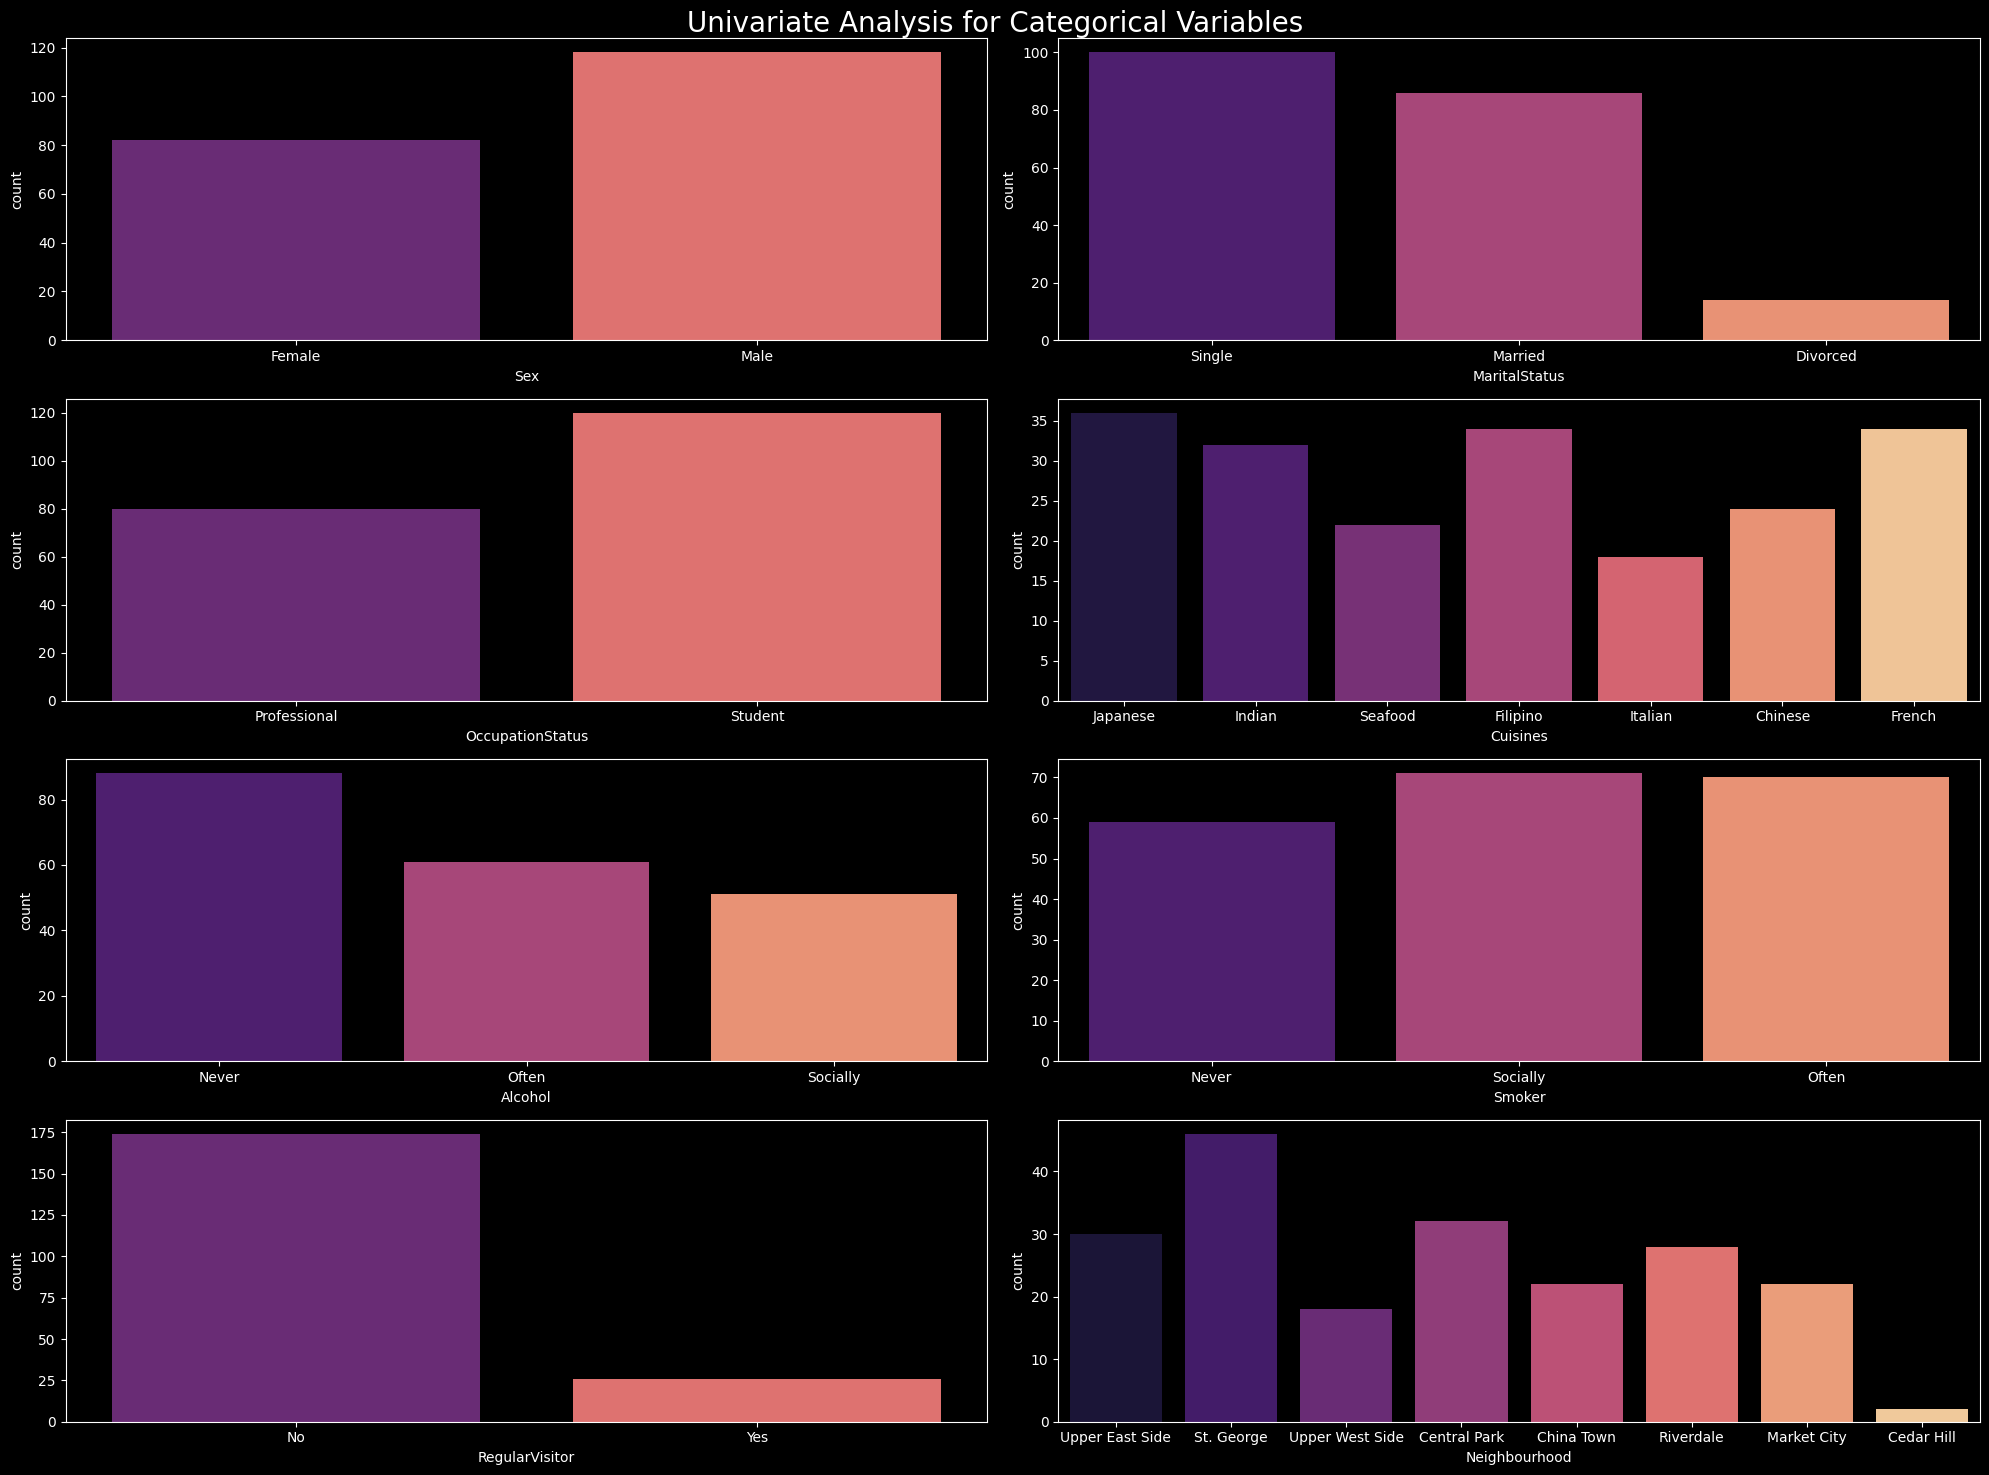

In [198]:
# Let us visualize Categorical Features 
plt.style.use('dark_background')
cat_cols=['Sex','MaritalStatus', 'OccupationStatus','Cuisines','Alcohol','Smoker','RegularVisitor','Neighbourhood']
fig,ax=plt.subplots(4,2,figsize=(20,15))
ax=ax.flatten()
i=0
for col in cat_cols:
    sns.countplot(data=df,x=col,ax=ax[i],hue=col,palette='magma')
    i+=1
fig.suptitle('Univariate Analysis for Categorical Variables',fontsize=20)
plt.tight_layout()
plt.show()

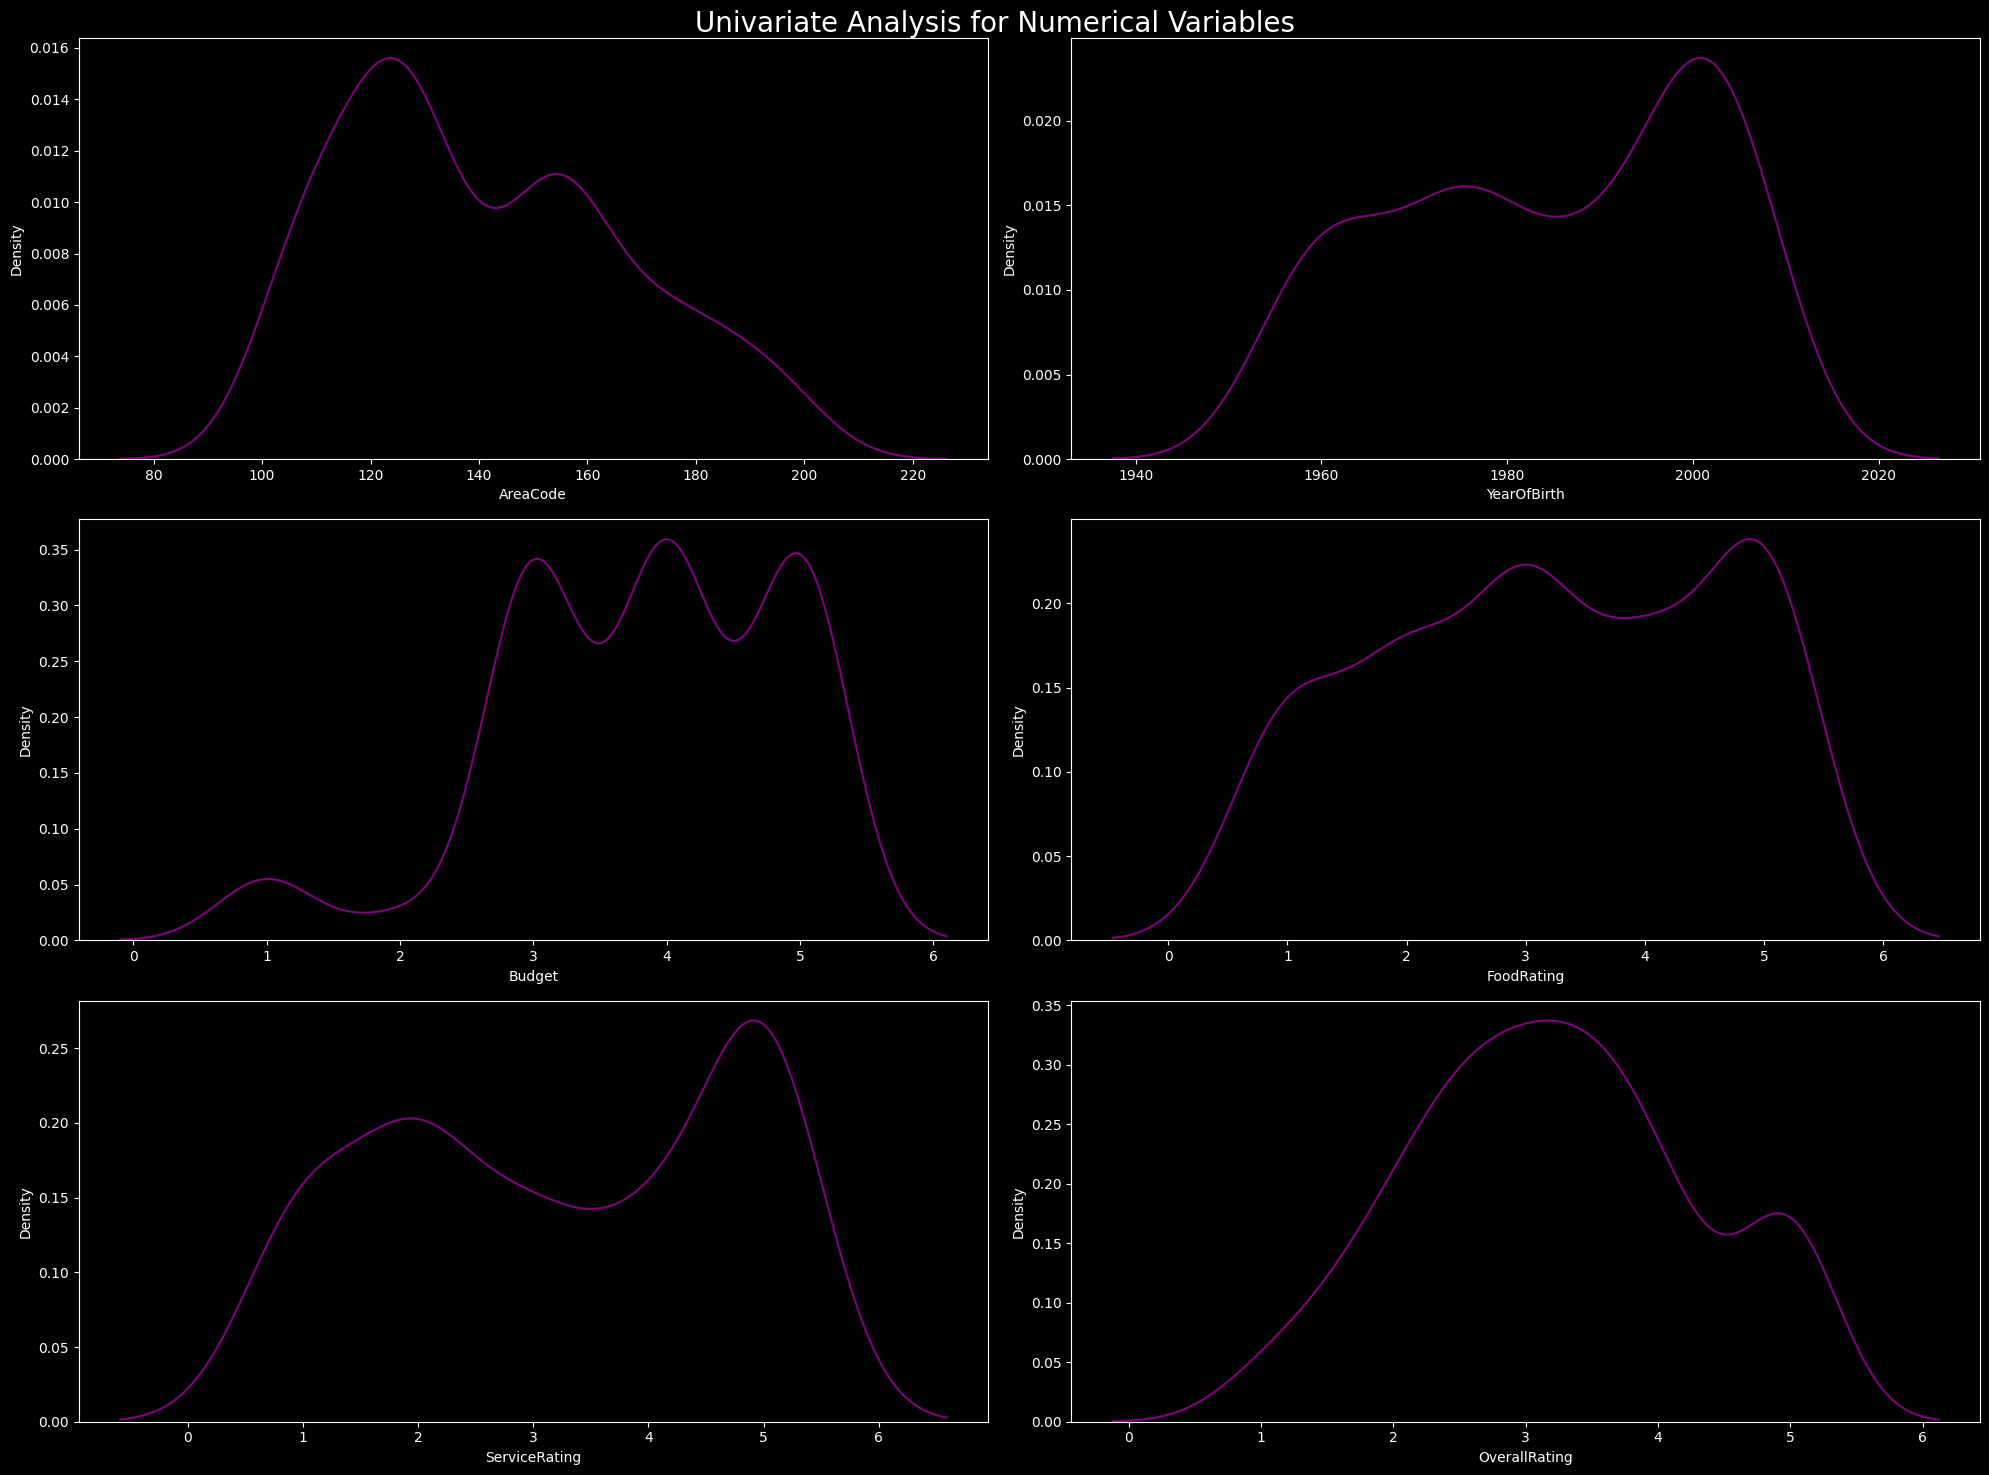

In [199]:
# Distribution of Numerical Columns
num_cols = [col for col in df.columns if col not in cat_cols] # numerical columns
exclude_cols = ['State', 'UserId']
num_cols = [col for col in num_cols if col not in exclude_cols]
fig,ax=plt.subplots(3,2,figsize=(20,15))
ax=ax.flatten()
i=0
for col in num_cols:
    sns.kdeplot(data=df,x=col,ax=ax[i],color='Purple')
    i+=1
fig.suptitle('Univariate Analysis for Numerical Variables',fontsize=20)
plt.tight_layout()
plt.show()

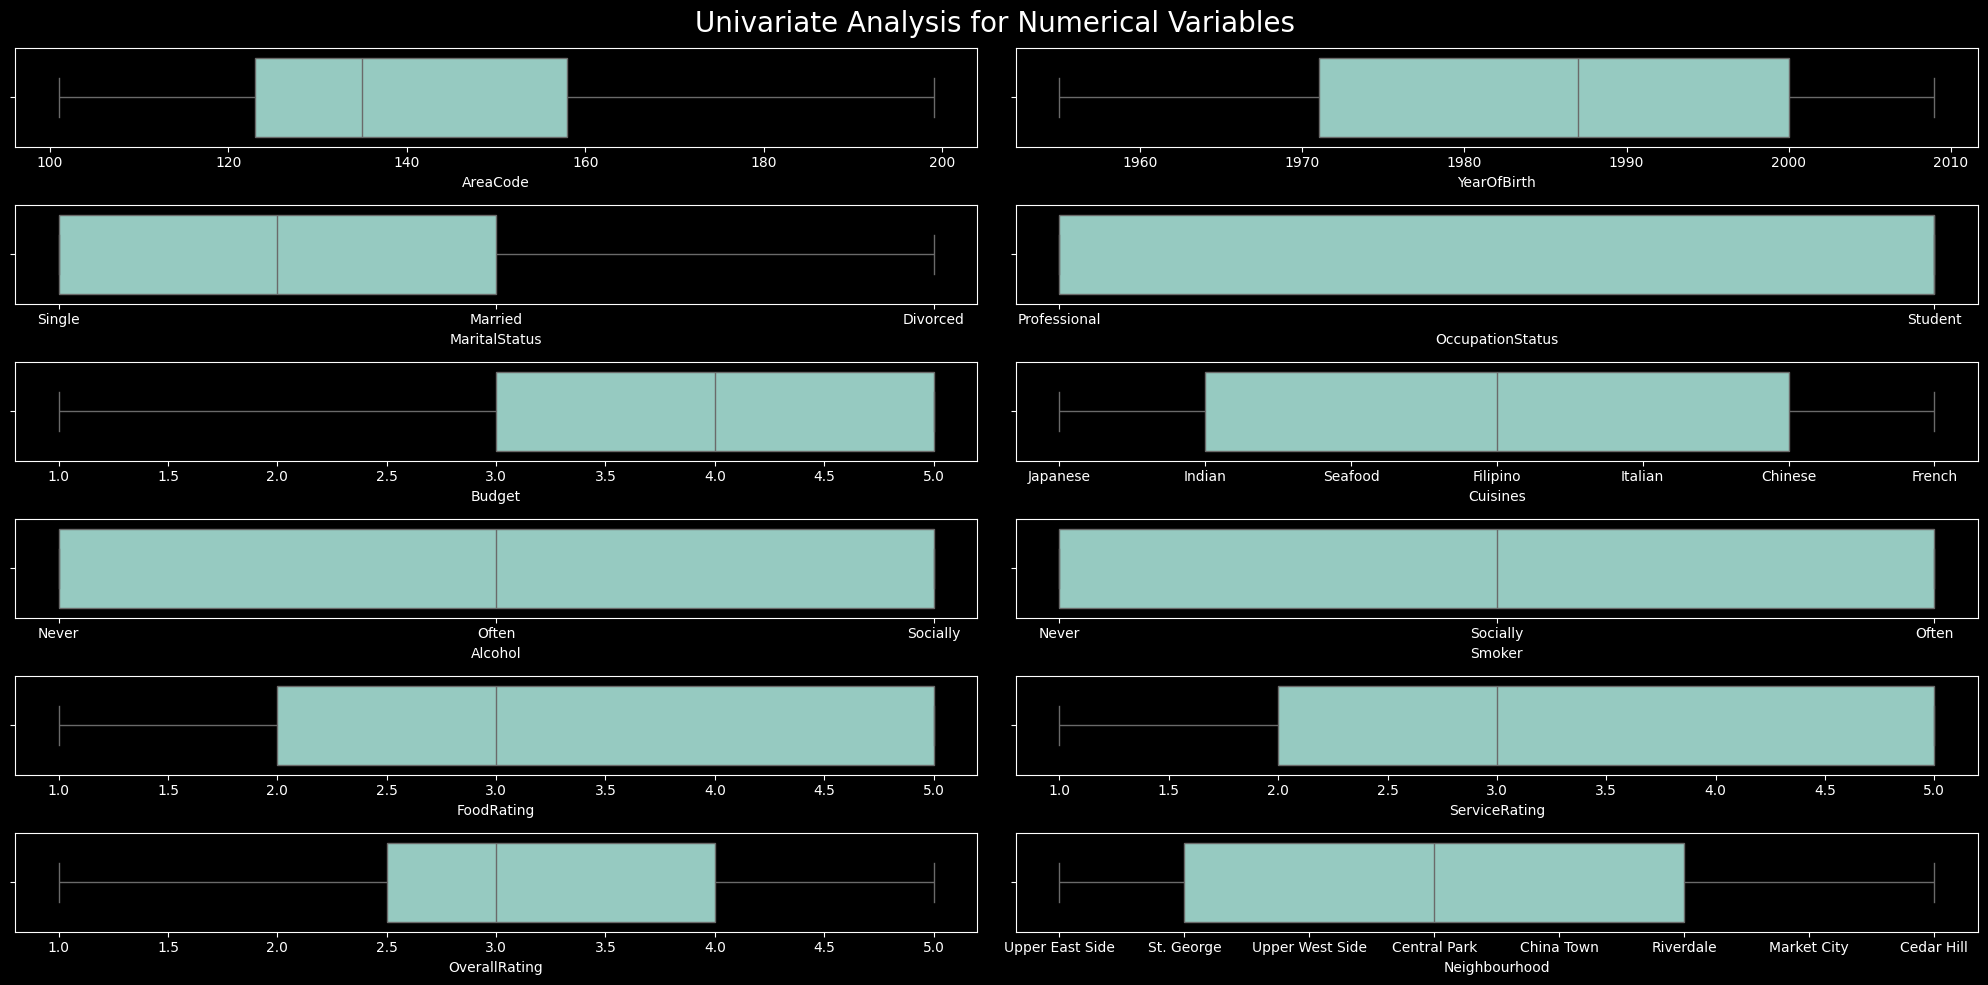

In [200]:
# Let us plot boxplots for each of the columsn except for Binary columns and State

nolike=['UserId','Sex','State','RegularVisitor']
cols=[col for col in df.columns if col not in nolike]

fig,ax=plt.subplots(6,2,figsize=(20,10))
ax=ax.flatten()
i=0
for col in cols:
    sns.boxplot(data=df,x=col,ax=ax[i])
    i+=1
fig.suptitle('Univariate Analysis for Numerical Variables',fontsize=20)
plt.tight_layout()
plt.show()

**Findings and Conclusions from the Univariate Analysis**
****
**Key Findings and Insights from Bar Plots:**<br>
1. Regular Visitors: A significant majority of customers are not regular visitors. Regular visitors form a small segment, which can be a potential target for loyalty programs or personalized offers.<br>
2. Neighbourhood Distribution: Most customers come from St. George, followed by Central Park and Upper East Side. Cedar Hill has very few visitors — this could be an area to either investigate for lack of engagement or deprioritize in marketing efforts.
3. Gender (Sex):There are more male customers than female customers.Gender-specific marketing can be explored based on this imbalance.<br>
4. Marital Status: Single and Married customers form the bulk of the customer base.Very few are Divorced, which may not need targeted strategies due to low volume.<br>
5. Occupation Status: There are more students than professionals.This indicates a younger demographic; pricing, menu preferences, and campaigns can be tailored accordingly.<br>
6. Cuisine Preferences: Japanese, Filipino, Indian, and French cuisines are most preferred. Italian and Seafood are less popular and might require evaluation of quality, pricing, or menu visibility.<br>
7. Alcohol Consumption: Majority of customers never consume alcohol, but a good number consume it often or socially.This suggests alcohol should remain on the menu, but its prominence can be balanced to cater to both groups.<br>
8. Smoking Habits: The distribution is fairly balanced between Never, Socially, and Often. Smoking zones, policies, or health-conscious initiatives can consider this even split.<br><br>

**Numerical Variables Analysis (Density Plots):**<br>

1. Year of Birth: Peaks around 1980s to early 2000s, suggesting a majority of customers are aged between 20–40 years.Aligns with the earlier finding that many are students or young professionals.<br>
2. Budget: Most customers have a moderate to high budget (around 3 to 5 units).Indicates that customers are not entirely price-sensitive.<br>
3. Food Rating: Peaks at 4 and 5, indicating general satisfaction with food.However, there are slight dips at 1–2, suggesting room for improvement.<br>
4. Service Rating: Majority of customers rate service between 2 and 5, with peaks at 2 and 5.Suggests service quality is polarizing—some are very satisfied, others not.<br>
5. Overall Rating: Skewed towards middle values (3–4), showing general satisfaction but not exceptional delight.Targeted improvements could help boost these scores.<br><br>

**Box Plot Conclusions:**
<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Median</th>
      <th>Skewness</th>
      <th>Outliers</th>
      <th>Comments</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>AreaCode</td>
      <td>~140</td>
      <td>Slightly Right</td>
      <td>Mild upper</td>
      <td>Regional clustering present</td>
    </tr>
    <tr>
      <td>YearOfBirth</td>
      <td>~1985–90</td>
      <td>Symmetric</td>
      <td>None</td>
      <td>Age mostly 25–40</td>
    </tr>
    <tr>
      <td>MaritalStatus</td>
      <td>Married</td>
      <td>Left-skewed</td>
      <td>None</td>
      <td>Majority are married individuals</td>
    </tr>
    <tr>
      <td>OccupationStatus</td>
      <td>Professional</td>
      <td>Slight right</td>
      <td>None</td>
      <td>More professionals than students</td>
    </tr>
    <tr>
      <td>Budget</td>
      <td>~4</td>
      <td>Symmetric</td>
      <td>Low-end</td>
      <td>Budget-conscious outliers present</td>
    </tr>
    <tr>
      <td>Cuisines</td>
      <td>Italian/Indian</td>
      <td>Multi-modal</td>
      <td>None</td>
      <td>Diverse preferences, some peaks in few cuisines</td>
    </tr>
    <tr>
      <td>Alcohol</td>
      <td>Socially</td>
      <td>Left-skewed</td>
      <td>None</td>
      <td>Most drink socially, fewer abstain or drink often</td>
    </tr>
    <tr>
      <td>Smoker</td>
      <td>Never</td>
      <td>Right-skewed</td>
      <td>None</td>
      <td>Majority are non-smokers</td>
    </tr>
    <tr>
      <td>FoodRating</td>
      <td>~3.5</td>
      <td>Left-skewed</td>
      <td>Low-end</td>
      <td>Mostly satisfied, but some low scores</td>
    </tr>
    <tr>
      <td>ServiceRating</td>
      <td>~3</td>
      <td>Slight left</td>
      <td>Low-end</td>
      <td>Varying service perceptions</td>
    </tr>
    <tr>
      <td>OverallRating</td>
      <td>~3.3</td>
      <td>Left-skewed</td>
      <td>Low-end</td>
      <td>Slight dissatisfaction in a few cases</td>
    </tr>
    <tr>
      <td>Neighbourhood</td>
      <td>Central Park / Riverdale</td>
      <td>Multi-modal</td>
      <td>None</td>
      <td>Central Park and Riverdale are frequent locales</td>
    </tr>
  </tbody>
</table>


## Analysis

In [201]:
# We do not need UserId,Area Code as well as the State (State has only New York as its data)
# Let us drop them and continue with our bivariate and multivariate analysis
df.drop(columns=['UserId','State','AreaCode'],inplace=True)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               200 non-null    object 
 1   YearOfBirth       200 non-null    int64  
 2   MaritalStatus     200 non-null    object 
 3   OccupationStatus  200 non-null    object 
 4   Budget            200 non-null    int64  
 5   Cuisines          200 non-null    object 
 6   Alcohol           200 non-null    object 
 7   Smoker            200 non-null    object 
 8   FoodRating        200 non-null    int64  
 9   ServiceRating     200 non-null    int64  
 10  OverallRating     200 non-null    float64
 11  RegularVisitor    200 non-null    object 
 12  Neighbourhood     200 non-null    object 
dtypes: float64(1), int64(4), object(8)
memory usage: 20.4+ KB


In [203]:
# Now let us take the column Sex and find the relationship between that and other columns
nolike=['FoodRating','ServiceRating','OverallRating','Sex','YearOfBirth']
relationcols=[col for col in df.columns if col not in nolike]
relationcols

['MaritalStatus',
 'OccupationStatus',
 'Budget',
 'Cuisines',
 'Alcohol',
 'Smoker',
 'RegularVisitor',
 'Neighbourhood']

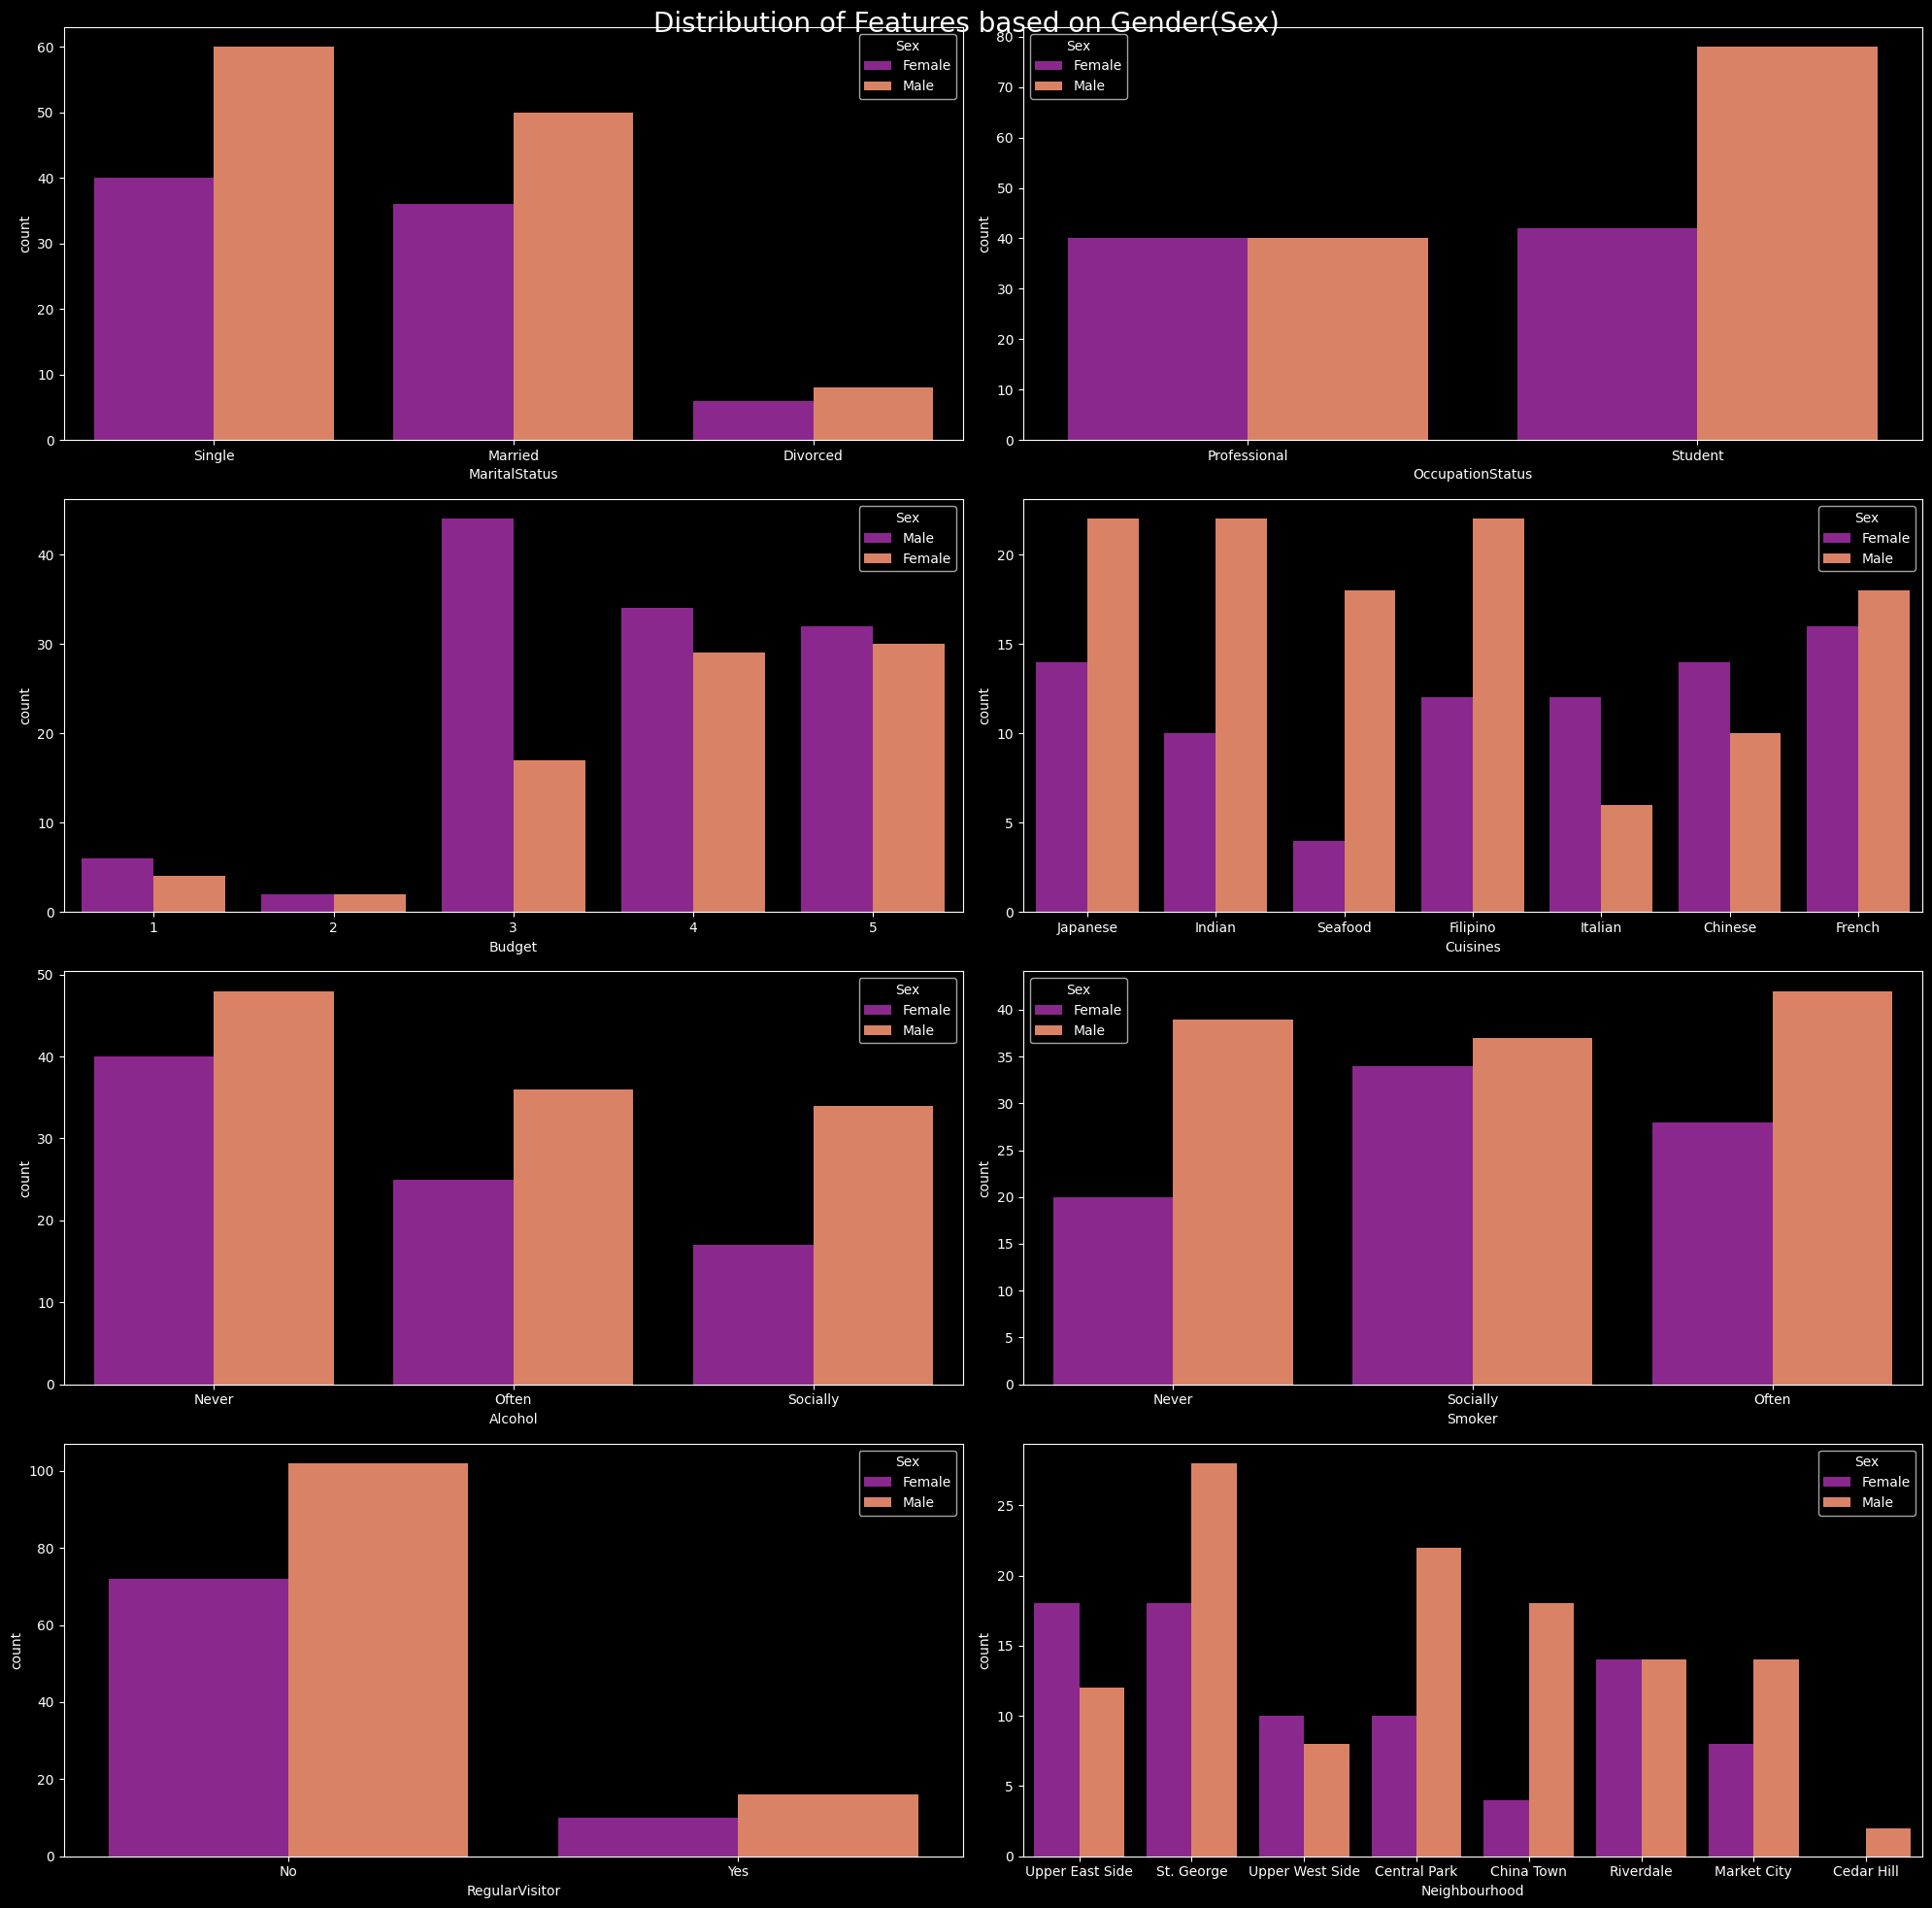

In [204]:
fig,ax=plt.subplots(4,2,figsize=(20,20))
ax=ax.flatten()
i=0
fig.suptitle("Distribution of Features based on Gender(Sex)",fontsize=20)
for col in relationcols:
    sns.countplot(data=df, x=col, hue='Sex', ax=ax[i],palette='plasma')
    i+=1
plt.tight_layout()
plt.show()

C:\Users\Samanyu K\AppData\Local\Temp\ipykernel_21884\3182748564.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Samanyu K\AppData\Local\Temp\ipykernel_21884\3182748564.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Samanyu K\AppData\Local\Temp\ipykernel_21884\3182748564.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
C:\Users\Samanyu K\AppData\Local\Temp\ipykernel_21884\3182748564.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` va

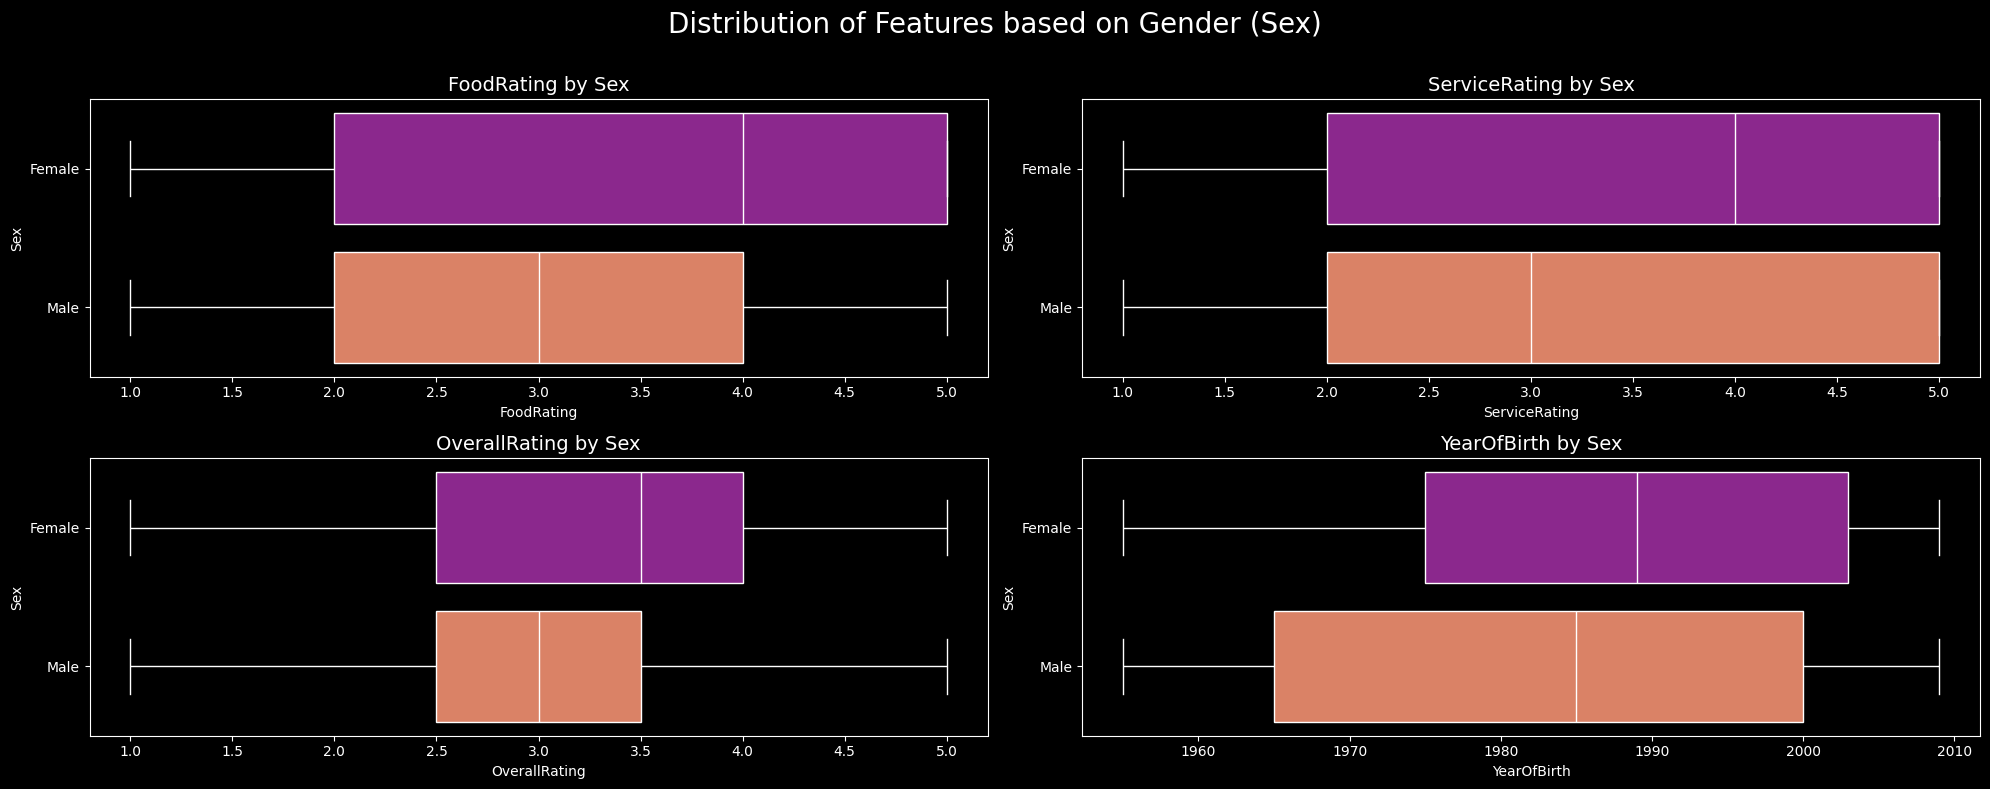

In [205]:
cols = ['FoodRating', 'ServiceRating', 'OverallRating', 'YearOfBirth']
fig, ax = plt.subplots(2, 2, figsize=(20, 8))
ax = ax.flatten()
fig.suptitle("Distribution of Features based on Gender (Sex)", fontsize=20)

for i, col in enumerate(cols):
    sns.boxplot(
        data=df,
        x=col,
        y='Sex',
        ax=ax[i],
        palette='plasma',
        boxprops=dict(edgecolor='white'),
        medianprops=dict(color='white'),
        whiskerprops=dict(color='white'),
        capprops=dict(color='white'),
        flierprops=dict(markeredgecolor='white')
    )
    ax[i].set_title(f"{col} by Sex", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.97]) 
plt.show()


<!DOCTYPE html>
<html lang="en">
<head>
  <meta charset="UTF-8">
  <style>
    body {
      font-family: 'Segoe UI', sans-serif;
      background-color: #111;
      color: #eee;
      line-height: 1.6;
      padding: 30px;
    }
    h1, h2, h3, h4 {
      color: #ffcc00;
    }
    table {
      width: 100%;
      border-collapse: collapse;
      margin-top: 20px;
      font-size: 15px;
    }
    th, td {
      border: 1px solid #444;
      padding: 12px;
      text-align: left;
      vertical-align: top;
    }
    th {
      background-color: #222;
      color: #ffcc00;
    }
    td {
      background-color: #1a1a1a;
    }
    .highlight-female {
      color: #c084fc;
      font-weight: bold;
    }
    .highlight-male {
      color: #60a5fa;
      font-weight: bold;
    }
    .tooltip {
      border-bottom: 1px dotted #888;
      cursor: help;
    }
  </style>
</head>
<body>

  <h3>Gender-Based Analysis</h3>

  <h4>1. Demographics</h4>
  <ul>
    <li><span class="highlight-female">Females</span> tend to be <strong>younger</strong> (median birth year: ~1995–2000), suggesting engagement from younger adult audiences.</li>
    <li><span class="highlight-male">Males</span> show a <strong>wider age range</strong>, including older customers born before 1980, indicating more long-term patrons.</li>
  </ul>

  <h4>2. Ratings Analysis</h4>
  <ul>
    <li><strong>Higher median scores</strong> from <span class="highlight-female">females</span> for <span class="tooltip" title="How the customer rated food quality and taste">FoodRating</span>, <span class="tooltip" title="How the customer rated service speed and hospitality">ServiceRating</span>, and <span class="tooltip" title="Overall impression including ambiance, value, and cleanliness">OverallRating</span>.</li>
    <li><span class="highlight-female">Female feedback</span> is more <strong>clustered around 4–5</strong>, with fewer low scores.</li>
    <li><span class="highlight-male">Male feedback</span> shows <strong>greater variance</strong>, more scores below 3, and broader spread.</li>
  </ul>

  <h4>3. Behavioral Trends by Category</h4>
  <table>
    <thead>
      <tr>
        <th>Feature</th>
        <th>Female Behavior (♀)</th>
        <th>Male Behavior (♂)</th>
        <th>Insights</th>
      </tr>
    </thead>
    <tbody>
      <tr>
        <td>Marital Status</td>
        <td>Predominantly <strong>Single</strong></td>
        <td>Majority are <strong>Married</strong></td>
        <td>Suggests tailoring promos: group dining for males vs. individual offers for females.</td>
      </tr>
      <tr>
        <td>Occupation</td>
        <td>Evenly distributed across professions (students, professionals, homemakers)</td>
        <td>Concentration in <strong>students and service roles</strong></td>
        <td>Male-centric offers may resonate with budget-conscious or student demographics.</td>
      </tr>
      <tr>
        <td>Budget</td>
        <td><strong>Mid-range spenders</strong> (e.g., $20–$40)</td>
        <td>Wide range from budget to premium spenders</td>
        <td>Pricing strategy should include bundles for males, quality value-for-money for females.</td>
      </tr>
      <tr>
        <td>Cuisine Preference</td>
        <td>Top choices: <strong>Japanese, Indian, Filipino</strong></td>
        <td>Favored: <strong>Seafood, French, American</strong></td>
        <td>Designing menus by gender preference could increase engagement.</td>
      </tr>
      <tr>
        <td>Alcohol Consumption</td>
        <td>Mostly <strong>Non-drinkers or Social drinkers</strong></td>
        <td>More evenly split, including <strong>frequent drinkers</strong></td>
        <td>Bar promotions and wine pairings could be male-targeted.</td>
      </tr>
      <tr>
        <td>Smoking Status</td>
        <td>Very few smokers</td>
        <td>Higher proportion of smokers</td>
        <td>Smoking zone arrangements and health-oriented segmentation could be gendered.</td>
      </tr>
      <tr>
        <td>Regular Visitor</td>
        <td>Less likely to be repeat customers</td>
        <td>More <strong>repeat visitors</strong></td>
        <td>Loyalty programs should be more aggressively marketed to males.</td>
      </tr>
      <tr>
        <td>Neighbourhoods</td>
        <td><strong>Upper East Side</strong>, Chinatown</td>
        <td><strong>St. George</strong>, Central Park</td>
        <td>Location-based marketing should consider gender-based footfall patterns.</td>
      </tr>
    </tbody>
  </table>

  <h4>4. Recommendations</h4>
  <ul>
    <li>Personalize menu and price points using <strong>gender-specific behavior patterns</strong>.</li>
    <li>Boost <span class="highlight-female">female retention</span> through loyalty incentives and ambiance enhancements.</li>
    <li>Segment marketing by <strong>age × gender</strong> for precise targeting.</li>
    <li>Consider <strong>location + lifestyle clustering</strong> when expanding campaigns or store locations.</li>
  </ul>

</body>
</html>


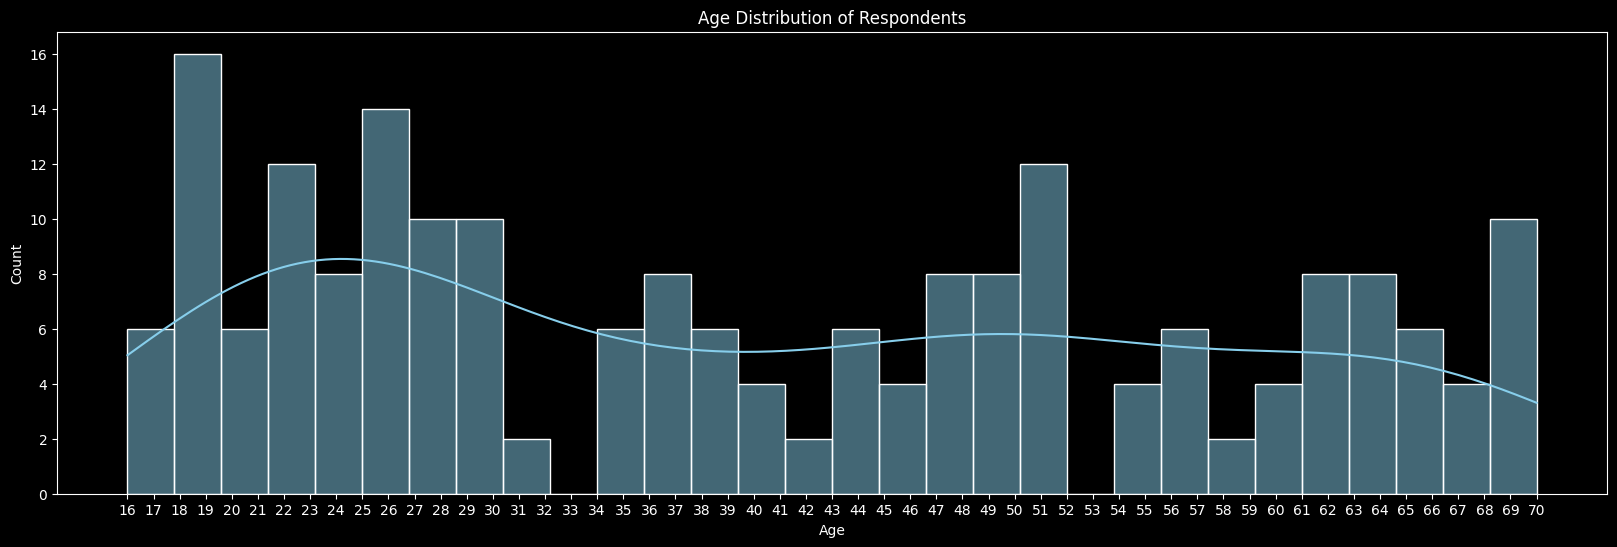

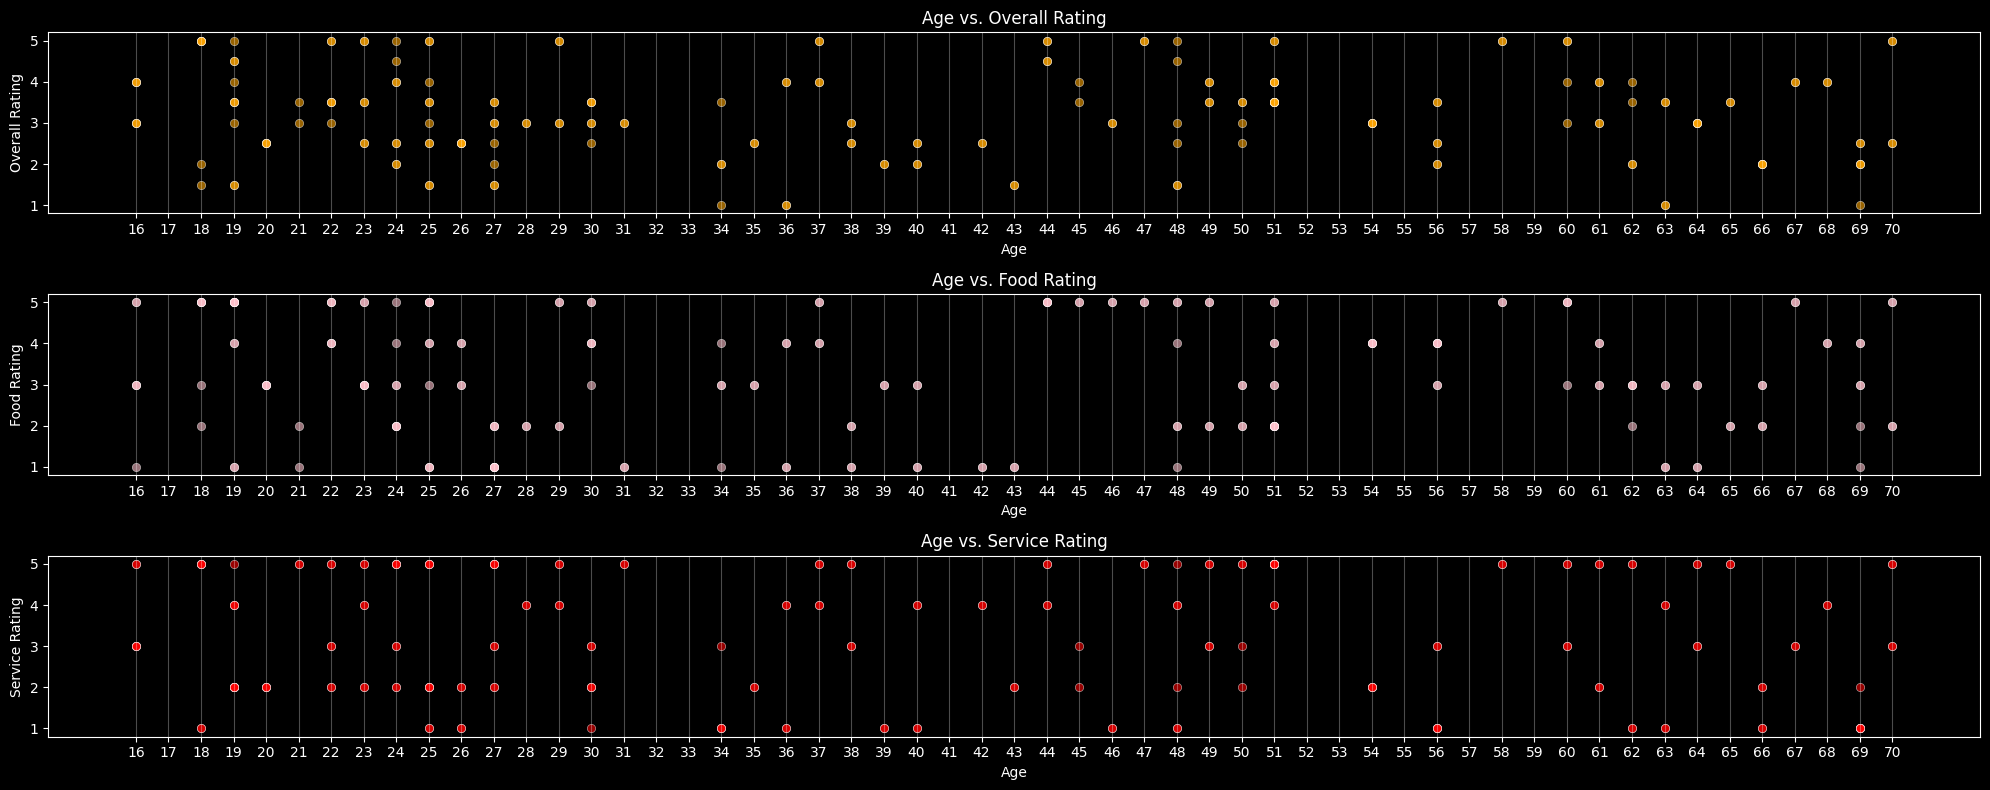

In [206]:
# Let us take a look at YearOfBirth and a new feature called Age
df['Age']=2025-df['YearOfBirth']
plt.figure(figsize=(20, 6))
age_min, age_max = df['Age'].min(), df['Age'].max()
plt.xticks(np.arange(int(age_min), int(age_max) + 1, 1))
sns.histplot(df['Age'], bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Respondents')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()


fig, axes = plt.subplots(3, 1, figsize=(20, 8), sharey=True)
age_min, age_max = df['Age'].min(), df['Age'].max()
x_ticks = np.arange(int(age_min), int(age_max) + 1, 1)

# Subplot 1: Age vs. OverallRating
sns.scatterplot(x='Age', y='OverallRating', data=df, alpha=0.6, ax=axes[0],color='orange')
axes[0].set_title('Age vs. Overall Rating')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Overall Rating')
axes[0].set_xticks(x_ticks)
axes[0].grid(True, axis='x', alpha=0.3)

# Subplot 2: Age vs. FoodRating
sns.scatterplot(x='Age', y='FoodRating', data=df, alpha=0.6, ax=axes[1],color='pink')
axes[1].set_title('Age vs. Food Rating')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Food Rating')
axes[1].set_xticks(x_ticks)
axes[1].grid(True, axis='x', alpha=0.3)

# Subplot 3: Age vs. ServiceRating
sns.scatterplot(x='Age', y='ServiceRating', data=df, alpha=0.6, ax=axes[2],color='red')
axes[2].set_title('Age vs. Service Rating')
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Service Rating')
axes[2].set_xticks(x_ticks)
axes[2].grid(True, axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

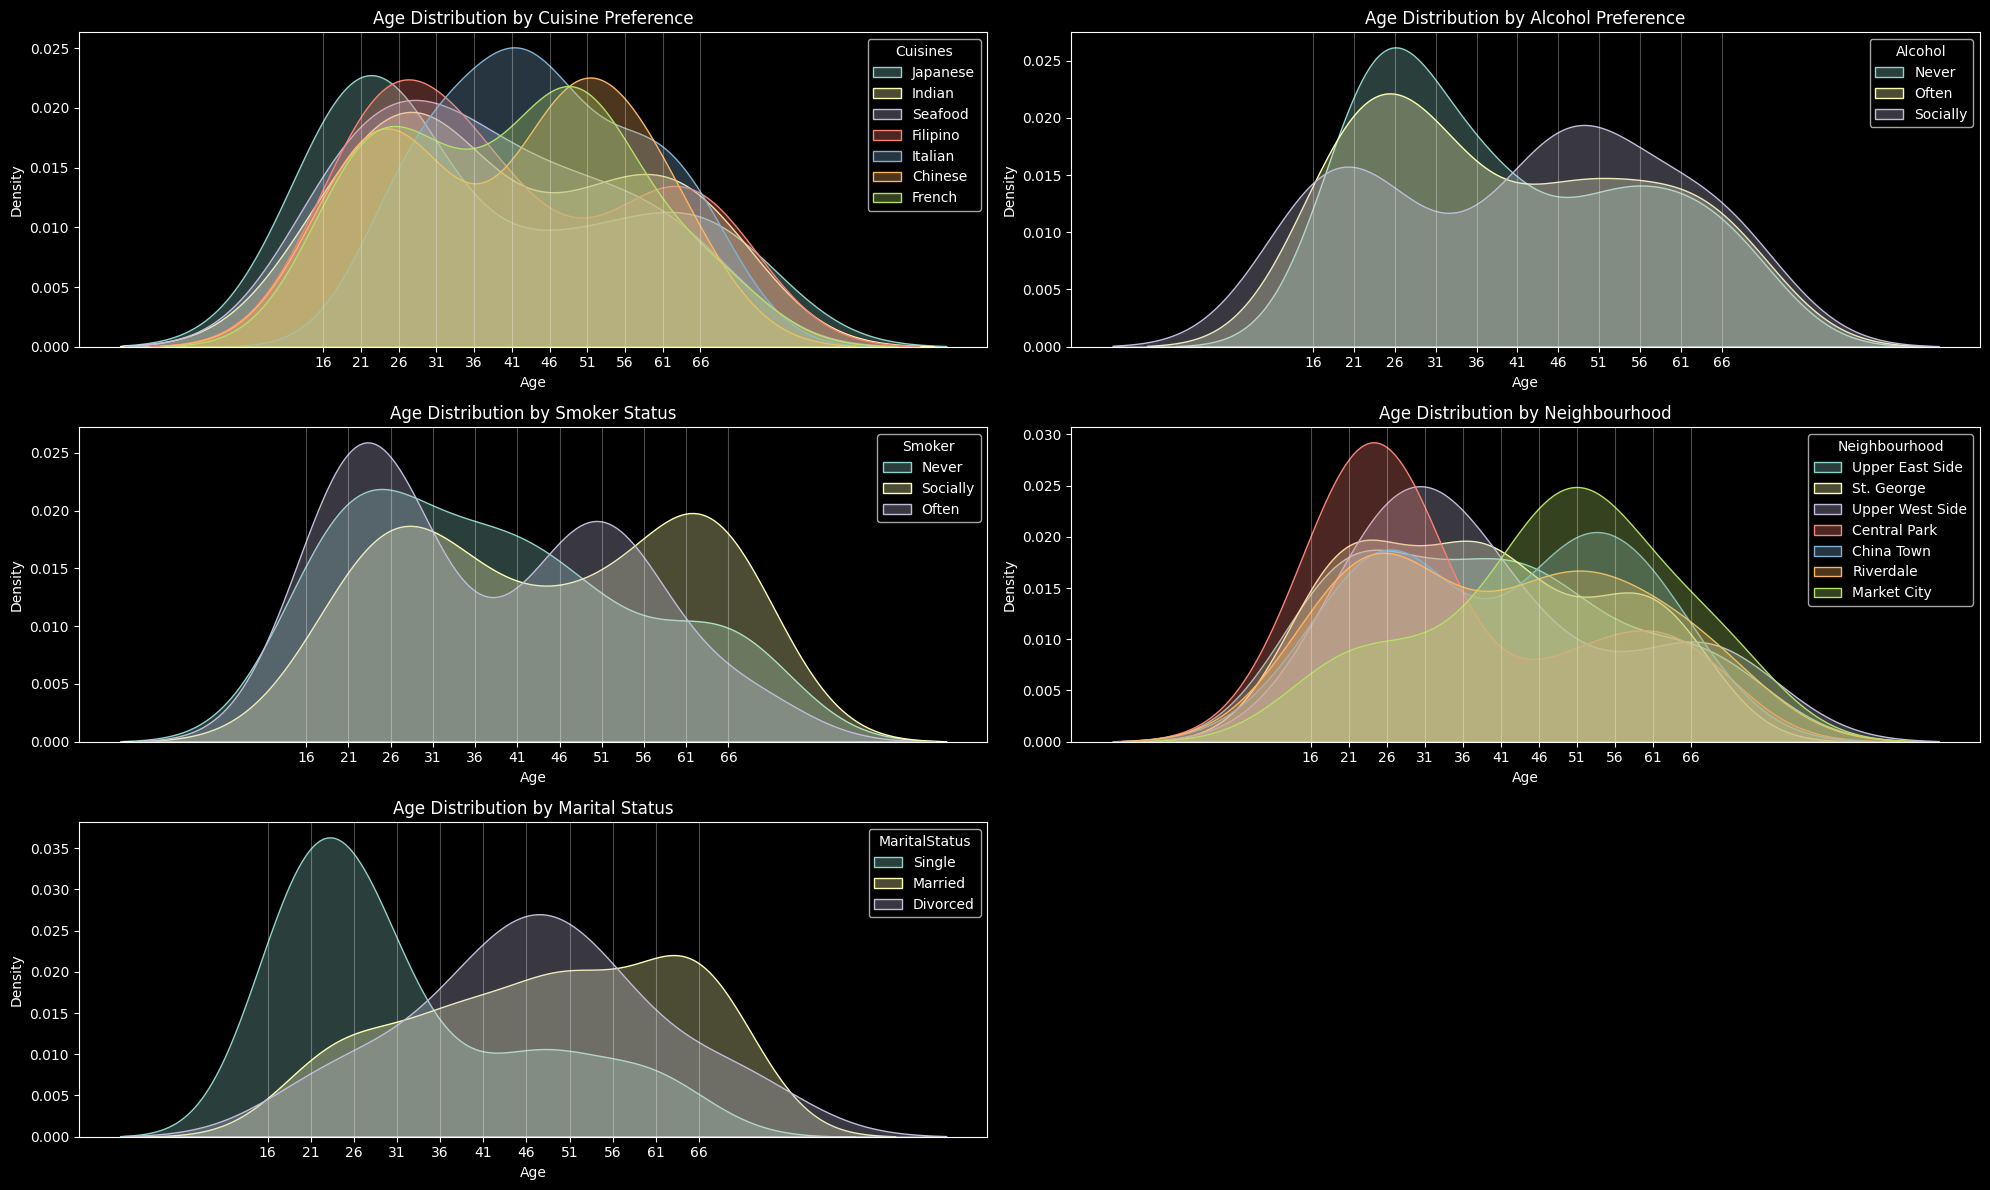

In [207]:
fig, axes = plt.subplots(3, 2, figsize=(20, 12))
axes = axes.flatten()  


age_min, age_max = df['Age'].min(), df['Age'].max()
x_ticks = np.arange(int(age_min), int(age_max) + 1, 5)
variables = ['Cuisines', 'Alcohol', 'Smoker', 'Neighbourhood', 'MaritalStatus']
titles = [
    'Age Distribution by Cuisine Preference',
    'Age Distribution by Alcohol Preference',
    'Age Distribution by Smoker Status',
    'Age Distribution by Neighbourhood',
    'Age Distribution by Marital Status'
]


for i, var in enumerate(variables):
    for category in df[var].unique():
        sns.kdeplot(
            df[df[var] == category]['Age'],label=category,fill=True,alpha=0.3,ax=axes[i],warn_singular=False)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel('Age')
    axes[i].set_ylabel('Density')
    axes[i].set_xticks(x_ticks)
    axes[i].grid(True, axis='x', alpha=0.3)
    axes[i].legend(title=var)

fig.delaxes(axes[-1])
plt.tight_layout()
plt.show()

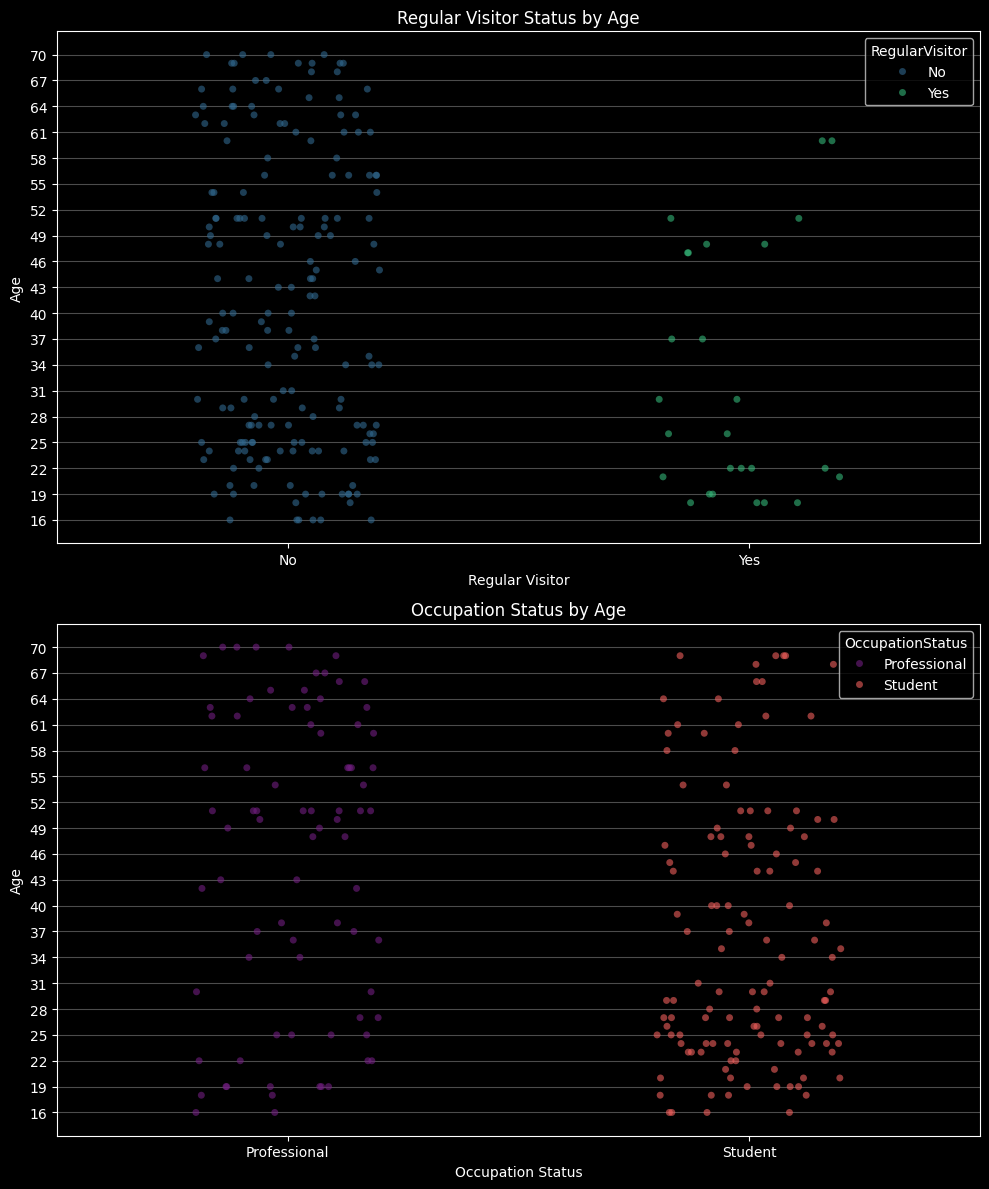

In [208]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = df.dropna(subset=['Age', 'RegularVisitor', 'OccupationStatus'])
df = df[df['Age'].between(0, 120)]

fig, axes = plt.subplots(2, 1, figsize=(10, 12), sharey=True)

age_min, age_max = df['Age'].min(), df['Age'].max()
y_ticks = np.arange(int(age_min), int(age_max) + 1, 3)

sns.stripplot(x='RegularVisitor', y='Age', data=df, jitter=0.2, alpha=0.6, hue='RegularVisitor', palette='viridis', legend=True, ax=axes[0])
axes[0].set_title('Regular Visitor Status by Age')
axes[0].set_xlabel('Regular Visitor')
axes[0].set_ylabel('Age')
axes[0].set_yticks(y_ticks)
axes[0].grid(True, axis='y', alpha=0.3)

sns.stripplot(x='OccupationStatus', y='Age', data=df, jitter=0.2, alpha=0.6, hue='OccupationStatus', palette='magma', legend=True, ax=axes[1])
axes[1].set_title('Occupation Status by Age')
axes[1].set_xlabel('Occupation Status')
axes[1].set_ylabel('Age')
axes[1].set_yticks(y_ticks)
axes[1].grid(True, axis='y', alpha=0.3)
axes[1].tick_params(axis='x')

plt.tight_layout()
plt.show()

**Age vs Ratings and Respondent Distribution**

1. Age Distribution of Respondents
- The respondents span across a wide age range (16 to 70).
- The most prominent age groups are:
  - **18–21**: This age range shows the highest participation, especially peaking at age 19.
  - **24–27** and **50–52** also show notable frequency.
- There is a noticeable dip in participation around the early 30s and mid-40s.

2. Age vs. Overall Rating
- **Overall ratings (1–5)** are spread across all age groups.
- Age groups **18–25** and **45–50** show a concentration of higher ratings (4 and 5).
- Very few low ratings are observed in these younger and middle-aged groups.
- Ratings become more variable and scattered in the older age group (60+), indicating a diversity in satisfaction levels.

3. Age vs. Food Rating
- Similar to the overall rating trend, younger (18–25) and middle-aged (45–50) individuals tend to give **higher food ratings**.
- Ages above **60** show a tendency toward lower food ratings, possibly reflecting higher expectations or dietary concerns.

4. Age vs. Service Rating
- High service ratings are most common in the **18–30** and **45–50** age brackets.
- Low service ratings appear more frequently in the **35–40** and **60+** age groups.
- The most consistent and balanced service appreciation comes from respondents aged around **45–50**.<br><br><br>

**Age-Based Trends in Lifestyle & Preferences**

This report explores how age, derived from YearOfBirth (calculated as Age = 2025 - YearOfBirth), influences lifestyle choices, neighborhood distribution, and dining preferences across five key variables: cuisine, alcohol, smoking, neighborhood, and marital status.

1. Age Distribution by Cuisine Preference

Trend: Younger respondents (closer to 18) show a preference for diverse or trendy cuisines (e.g., Asian, fusion), while preferences shift toward traditional cuisines (e.g., European, classic) as age increases toward 70.
Observation: The density of cuisine preferences varies smoothly with age, with peaks for certain cuisines at younger and older ages.
Insight: Offer a balanced menu with trendy, bold flavors for younger diners and familiar, high-quality options for older customers to cater to age-driven tastes.

2. Age Distribution by Alcohol Preference

Trend: Respondents who "Never" drink are more common at younger ages (around 18–25) and older ages (60+), while "Socially" drinking peaks around ages 25–45, and "Often" drinking increases gradually from 30 to 55.
Observation: Social drinking aligns with active social or professional phases, while non-drinking is prevalent at age extremes.
Actionable Suggestion: Promote non-alcoholic beverages and mocktails for younger and older demographics, alongside curated wine or cocktail menus for mid-age social drinkers.

3. Age Distribution by Smoker Status

Trend: "Never" smokers are more prevalent among younger respondents (18–30), while "Socially" smoking peaks around ages 25–45, and "Often" smokers increase with age, peaking around 45–65.
Observation: Smoking habits appear tied to social influences in mid-ages and long-term habits in older ages.
Health Promotion Opportunity: Emphasize smoke-free environments and wellness-focused dining (e.g., outdoor seating) to attract younger, non-smoking customers.

4. Age Distribution by Neighborhood

Trend: Younger respondents (18–30) are more concentrated in vibrant, urban neighborhoods (e.g., areas with nightlife or student housing), while older respondents (45–70) dominate in stable, residential areas.
Observation: Certain neighborhoods show a mix of ages, indicating broad appeal or diverse amenities.
Strategy: Tailor marketing by neighborhood—use digital, youth-oriented campaigns for urban areas and loyalty programs or traditional media for residential zones.

5. Age Distribution by Marital Status

Trend: Single respondents are more common at younger ages (18–32), married respondents peak around ages 35–60, and divorced respondents increase from 45–65.
Observation: Marital status aligns with life stages, influencing dining behavior (e.g., solo vs. family dining).
Targeted Campaign Ideas:
Singles: Promotions for solo dining or social group events.
Married: Family meal deals or early dinner packages.
Divorced: Midweek specials or solo-friendly dining experiences.



6. Summary Table


<table border="1" cellpadding="8" cellspacing="0">
  <thead>
    <tr>
      <th>Variable</th>
      <th>Age Trend Description</th>
      <th>Key Takeaway</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Cuisine Preference</td>
      <td>Trendy cuisines (e.g., Asian) at younger ages; traditional (e.g., European) at older ages</td>
      <td>Balance trendy and classic menu options</td>
    </tr>
    <tr>
      <td>Alcohol Preference</td>
      <td>Non-drinkers at 18–25 and 60+; social drinkers at 25–45; frequent drinkers at 30–55</td>
      <td>Promote mocktails for non-drinkers, cocktails for mid-ages</td>
    </tr>
    <tr>
      <td>Smoker Status</td>
      <td>Non-smokers at 18–30; social smokers at 25–45; frequent smokers at 45–65</td>
      <td>Emphasize smoke-free, wellness-focused dining</td>
    </tr>
    <tr>
      <td>Neighborhood</td>
      <td>Urban areas for 18–30; residential for 45–70; mixed-age in some areas</td>
      <td>Tailor marketing by neighborhood vibe</td>
    </tr>
    <tr>
      <td>Marital Status</td>
      <td>Single at 18–32; married at 35–60; divorced at 45–65</td>
      <td>Offer dining experiences tied to life stages</td>
    </tr>
  </tbody>
</table>






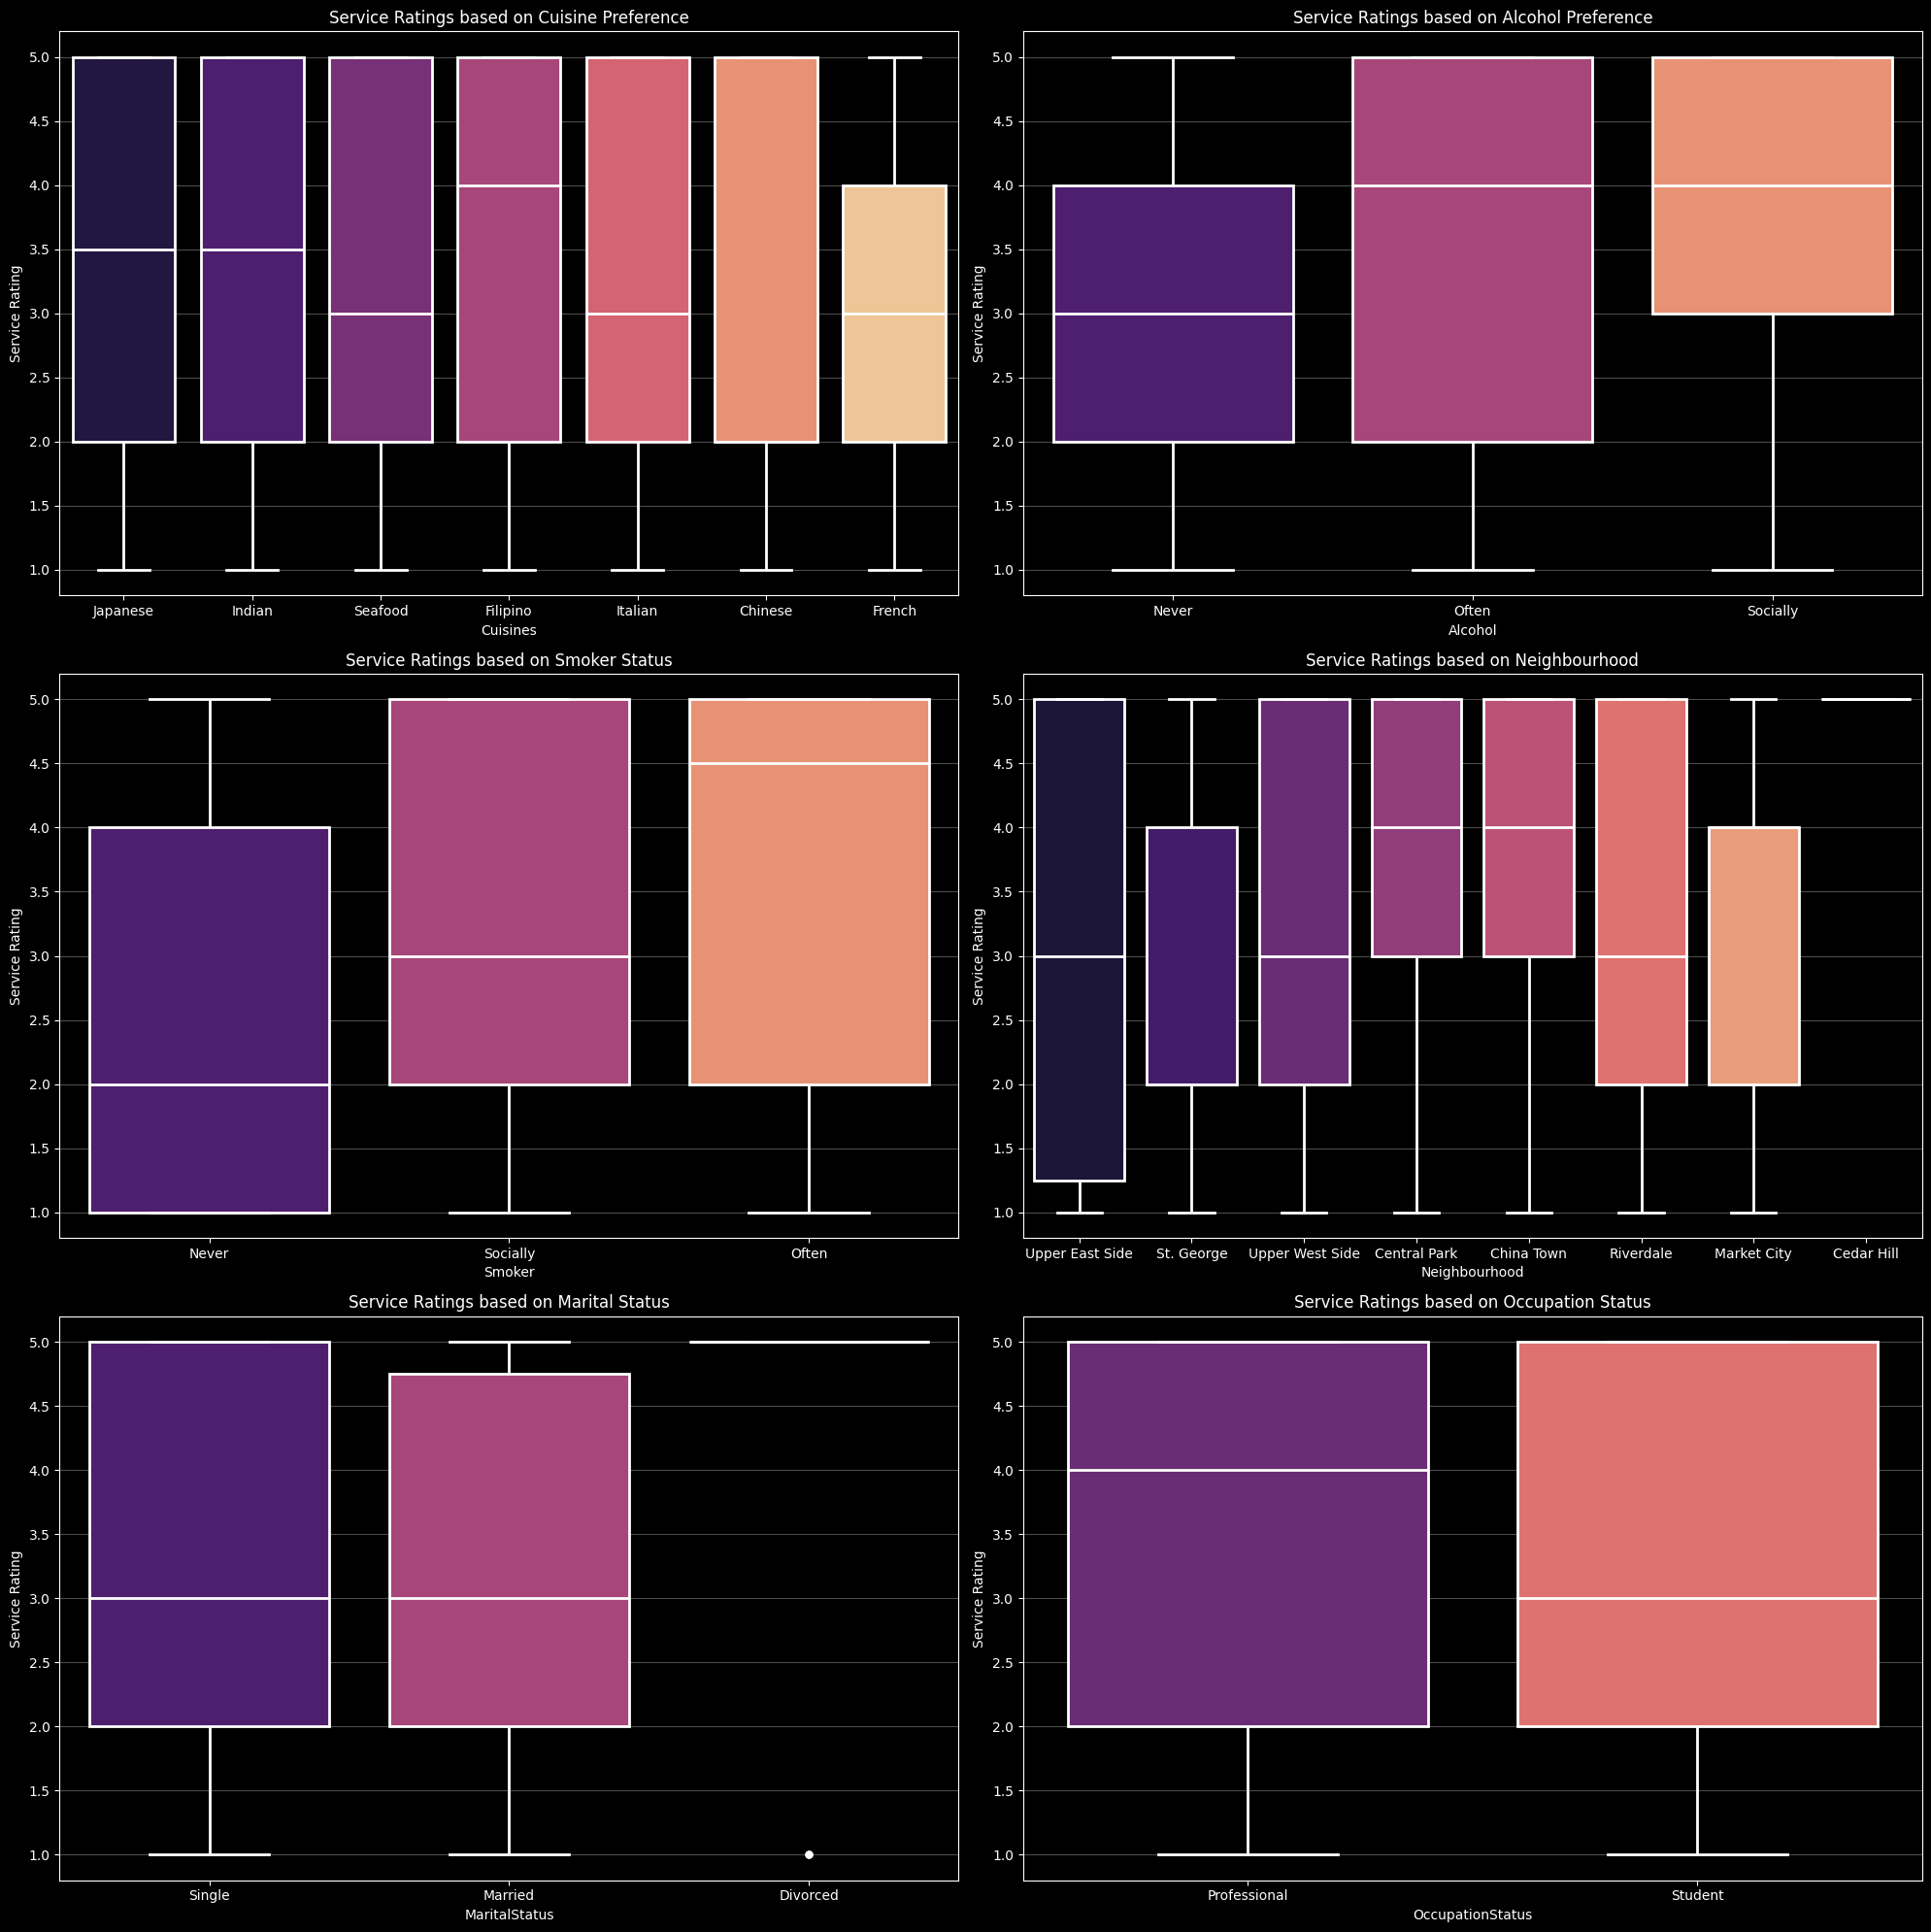

In [213]:
# Let us look at Ratings vs Smoker, Alcohol, Occupation, Marital Status as well as Cuisines
variables = ['Cuisines', 'Alcohol', 'Smoker', 'Neighbourhood', 'MaritalStatus', 'OccupationStatus']
titles = [
    'Service Ratings based on Cuisine Preference',
    'Service Ratings based on Alcohol Preference',
    'Service Ratings based on Smoker Status',
    'Service Ratings based on Neighbourhood',
    'Service Ratings based on Marital Status',
    'Service Ratings based on Occupation Status'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flatten()


for i, var in enumerate(variables):
    sns.boxplot(
        data=df, x=var, y='ServiceRating', ax=axes[i],hue=var, palette='magma', boxprops=dict(edgecolor='white', linewidth=2),
        whiskerprops=white_props,capprops=white_props,medianprops=white_props,
        flierprops=dict(markerfacecolor='white', marker='o', markersize=5, linestyle='none', markeredgecolor='white')
    )
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Service Rating')
    axes[i].set_xlabel(var)
    axes[i].tick_params(axis='x')
    axes[i].grid(True, axis='y', alpha=0.3)


plt.tight_layout()
plt.show()

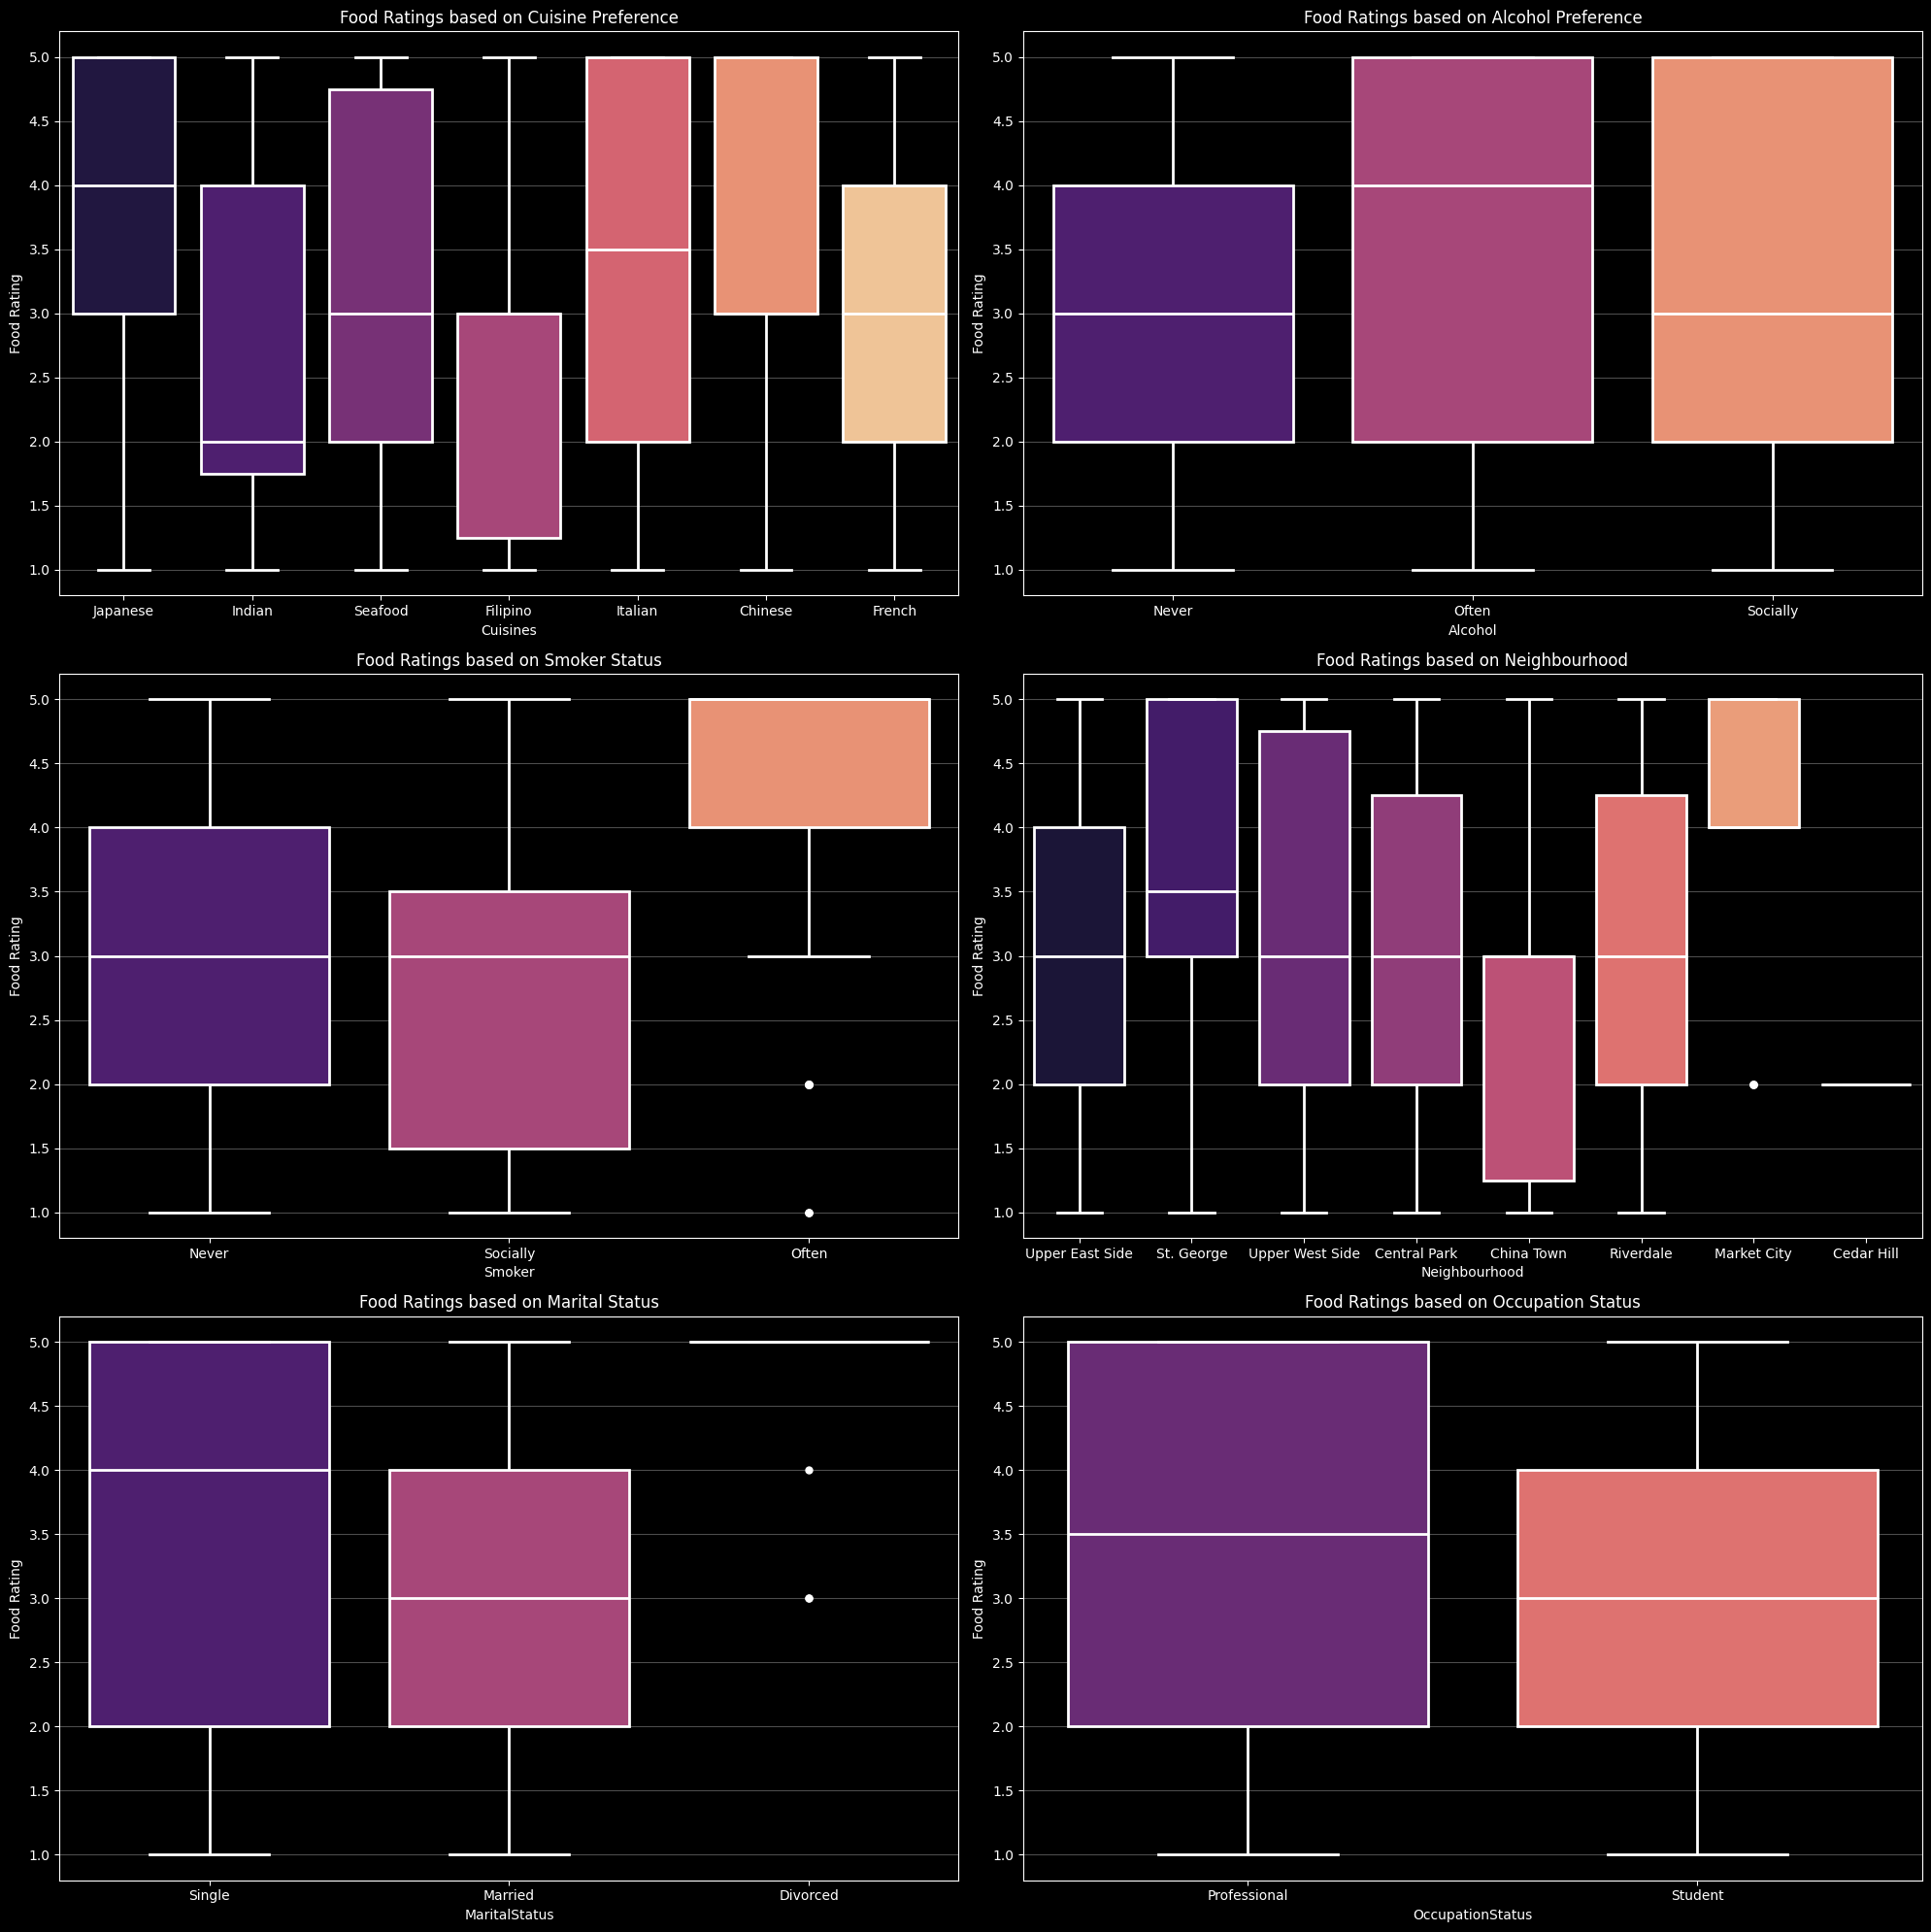

In [215]:
variables = ['Cuisines', 'Alcohol', 'Smoker', 'Neighbourhood', 'MaritalStatus', 'OccupationStatus']
titles = [
    'Food Ratings based on Cuisine Preference',
    'Food Ratings based on Alcohol Preference',
    'Food Ratings based on Smoker Status',
    'Food Ratings based on Neighbourhood',
    'Food Ratings based on Marital Status',
    'Food Ratings based on Occupation Status'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flatten()


for i, var in enumerate(variables):
    sns.boxplot(
        data=df, x=var, y='FoodRating', ax=axes[i],hue=var, palette='magma', boxprops=dict(edgecolor='white', linewidth=2),
        whiskerprops=white_props,capprops=white_props,medianprops=white_props,
        flierprops=dict(markerfacecolor='white', marker='o', markersize=5, linestyle='none', markeredgecolor='white')
    )
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Food Rating')
    axes[i].set_xlabel(var)
    axes[i].tick_params(axis='x')
    axes[i].grid(True, axis='y', alpha=0.3)


plt.tight_layout()
plt.show()

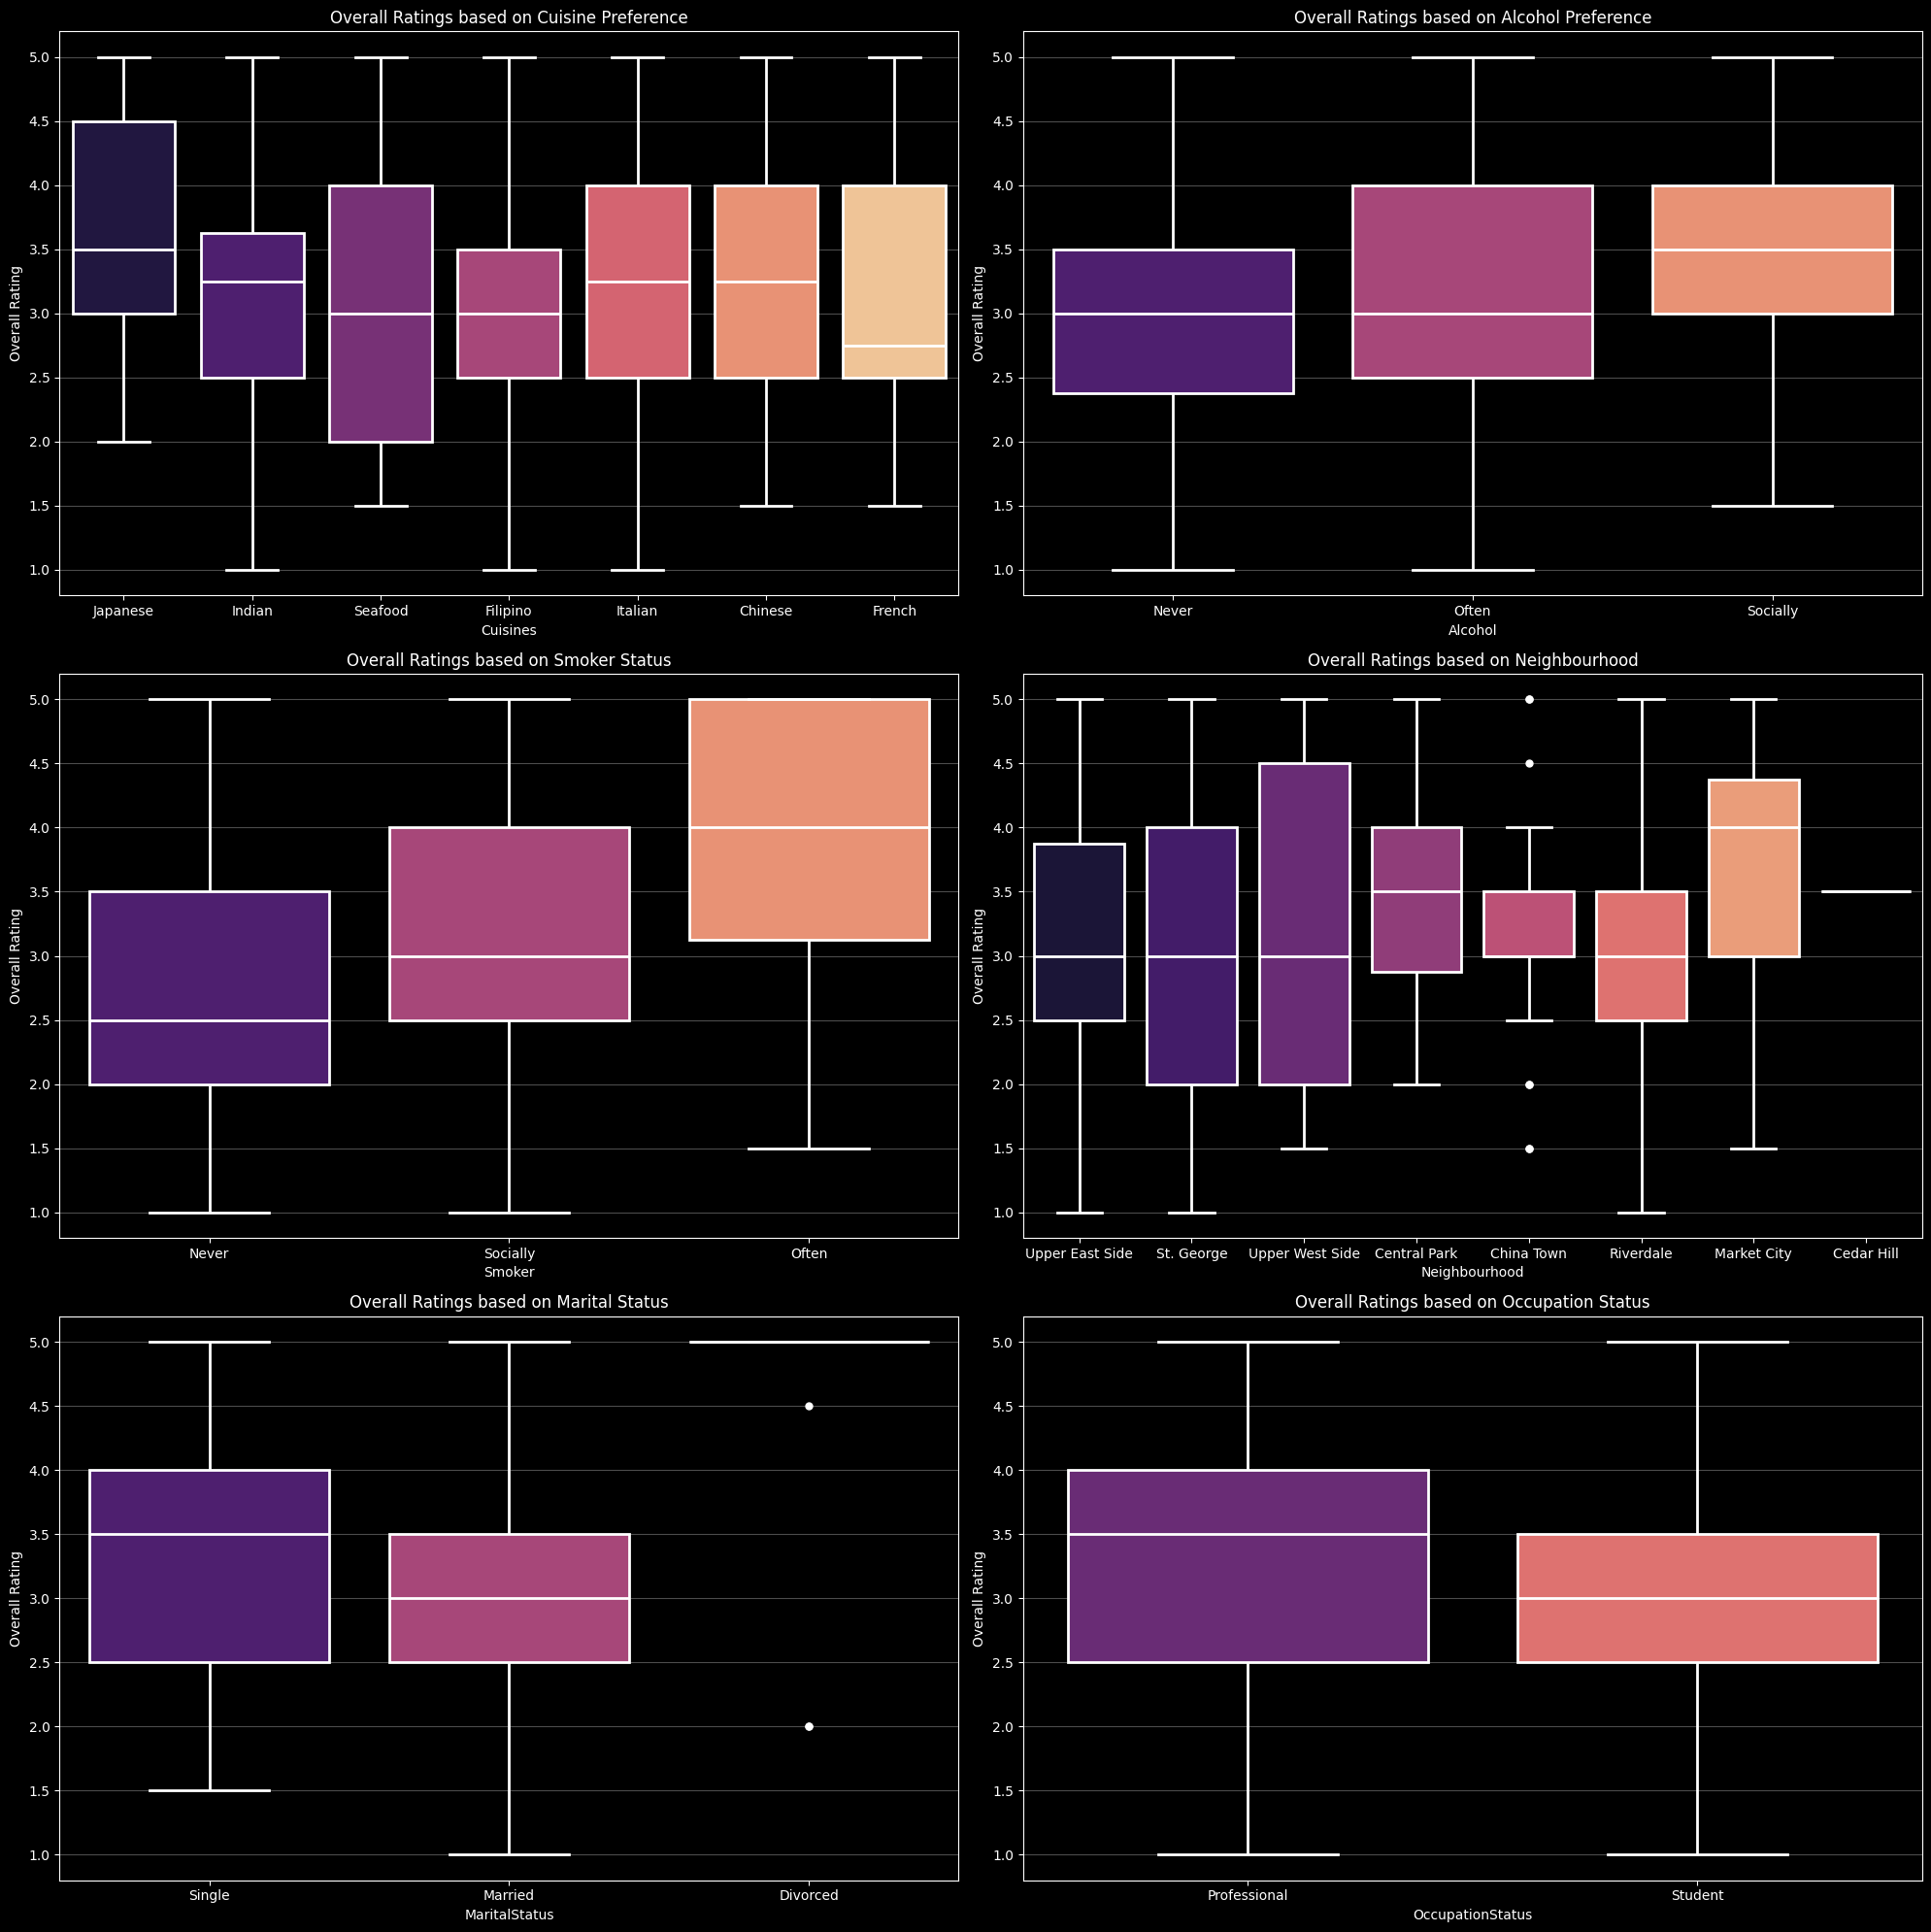

In [216]:
variables = ['Cuisines', 'Alcohol', 'Smoker', 'Neighbourhood', 'MaritalStatus', 'OccupationStatus']
titles = [
    'Overall Ratings based on Cuisine Preference',
    'Overall Ratings based on Alcohol Preference',
    'Overall Ratings based on Smoker Status',
    'Overall Ratings based on Neighbourhood',
    'Overall Ratings based on Marital Status',
    'Overall Ratings based on Occupation Status'
]

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(20, 20))
axes = axes.flatten()


for i, var in enumerate(variables):
    sns.boxplot(
        data=df, x=var, y='OverallRating', ax=axes[i],hue=var, palette='magma', boxprops=dict(edgecolor='white', linewidth=2),
        whiskerprops=white_props,capprops=white_props,medianprops=white_props,
        flierprops=dict(markerfacecolor='white', marker='o', markersize=5, linestyle='none', markeredgecolor='white')
    )
    axes[i].set_title(titles[i])
    axes[i].set_ylabel('Overall Rating')
    axes[i].set_xlabel(var)
    axes[i].tick_params(axis='x')
    axes[i].grid(True, axis='y', alpha=0.3)


plt.tight_layout()
plt.show()

**Statistical Insights on Service Ratings**

This section provides statistical interpretations of how different demographic and preference-based features influence service ratings.


1. **Marital Status**
- **Median rating** is consistent (~3.0) across Single, Married, and Divorced groups.
- **Interquartile Range (IQR)** is largest for Divorced individuals, indicating greater variability in their ratings.
- **Outliers** observed for Divorced status (notably low values) suggest a small subset of dissatisfied customers.

*Insight:* Marital status does not significantly influence the median rating, but variability in divorced individuals' responses may indicate inconsistent service experiences in that group.


2. **Occupation Status**
- **Professionals** have a slightly higher **median rating (≈4.0)** than **Students (≈3.0)**.
- Both groups show wide IQRs, but Professionals skew toward higher satisfaction.

*Insight:* Occupation is a moderate factor. Professionals tend to rate services more favorably, possibly due to better service alignment with their expectations or needs.


3. **Cuisine Preference**
- Most cuisines have **similar medians (3.5 to 4.0)**.
- **French cuisine** stands out with a lower **median (~2.5–3.0)** and narrower IQR.
- Other cuisines (e.g., Japanese, Indian) show broader rating distributions and higher satisfaction peaks.

*Insight:* While cuisine type generally does not cause major differences in service ratings, French cuisine is an exception, indicating potential issues in service delivery or alignment with expectations.


4. **Alcohol Preference**
- **Non-drinkers** show a **lower median (~3.0)** than those who **drink socially or often (~4.0)**.
- Distribution for drinkers is more right-skewed, showing greater high-end satisfaction.

*Insight:* Service settings that cater to alcohol preferences may be enhancing perceived value and satisfaction for those customers.


5. **Smoker Status**
- **Regular smokers** report the **highest median ratings (~4.5)**.
- **Social smokers** follow, with **non-smokers** rating the lowest (~3.0).
- Smokers exhibit tighter, higher distributions compared to non-smokers.

*Insight:* Smoking-friendly environments may correlate with higher satisfaction levels, suggesting an environmental comfort factor.


6. **Neighbourhood**
- **Highest median ratings** observed in **Upper East Side**, **Upper West Side**, and **China Town (~4.0+)**.
- **Market City** and **Cedar Hill** exhibit **lower medians (~2.5–3.0)** and broader variability.
  
*Insight:* Service quality appears geographically influenced; higher-income or urban centers receive better ratings. Strategic improvement efforts should focus on lower-performing neighborhoods.


**Summary**
- **Statistical medians** and **variability** suggest consistent service experiences across demographics, with **location**, **smoking**, and **alcohol preferences** being the most statistically impactful.
- **Targeted improvements** should focus on:
  - Lower-rated neighborhoods.
  - French cuisine experiences.
  - Non-smokers and non-drinkers' service interactions.
<br><br><br>
---
<br><br><br>
**Statistical Insights on Food Ratings**

This section provides a detailed statistical breakdown of how food ratings vary across different demographic and preference-based groups.



1. **Cuisine Preference**
- **Highest median food ratings** observed for:  
  - **Japanese**, **Chinese**, and **Italian** cuisines (~4.0).
- **Lowest medians** are seen in **Filipino Cuisines (~3.0)** with a wide interquartile range (IQR), indicating high inconsistency.
- **French cuisine** has a slightly lower median (~3.5) with tighter IQR, suggesting consistent but moderate satisfaction.

*Insight:* Japanese and Chinese cuisines are clear leaders in satisfaction, while Filipino cuisine may require quality improvements due to both lower median and high variability.


2. **Alcohol Preference**
- **Median rating**:
  - **Never**: ~3.0
  - **Socially**: ~3.0
  - **Often**: ~4.0
- **Regular drinkers** exhibit both higher medians and upper quartiles.

*Insight:* Frequent alcohol consumers report significantly higher food satisfaction, potentially due to enhanced dining ambiance or pairing.

3. **Smoker Status**
- **Regular smokers** have the highest median (~4.5) and narrow IQR, showing strong and consistent satisfaction.
- **Non-smokers** and **social smokers** show similar medians (~3.0), but greater spread in ratings.

*Insight:* Smoking-permitted environments may enhance food satisfaction for regular smokers; non-smokers appear more divided in their experiences.

4. **Neighbourhood**
- **Top performers** in median food ratings:  
  - **Market City**, **St. George**, **Upper West Side**
- **Lower medians** and greater variability:  
  - **China Town**, **Cedar Hill**, **Riverdale**

*Insight:* Market City residents report the highest and most consistent satisfaction. Targeted quality improvements could focus on underperforming areas like China Town.

5. **Marital Status**
- **Single** diners show the highest median rating (~4.0), with a large IQR indicating varied experiences.
- **Married** and **Divorced** individuals have lower medians (~3.0), with divorced individuals showing some high-end outliers.

*Insight:* Single individuals tend to be more satisfied with food, though variability is high. The lower ratings from married customers may reflect more complex expectations.

6. **Occupation Status**
- **Professionals**: Median ~3.5
- **Students**: Median ~3.0
- Professionals also have a slightly wider upper range, indicating more frequent high ratings.

*Insight:* Professionals are more likely to rate food favorably than students, possibly due to greater purchasing power or dining exposure.


**Summary**
- **Highest satisfaction segments**:
  - Cuisine: Japanese, Chinese
  - Preference: Regular alcohol and tobacco consumers
  - Region: Market City
  - Demographics: Single professionals
- **Areas needing improvement**:
  - Filipino cuisine
  - Non-smoking, non-drinking diners
  - China Town and Cedar Hill neighborhoods
<br><br><br>
---
<br><br><br>
**Statistical Insights on Overall Ratings**

1. Cuisine Preference

- Japanese cuisine stands out with the highest median (~4.5), indicating strong approval.
- French and Chinese have lower medians, with broader variability, reflecting mixed reviews.
- Most cuisines have outliers; Filipino and French show lower consistency overall.

2. Alcohol Preference

- Social drinkers provide higher median ratings (~4), suggesting more positive experiences.
- Never-drinkers have wider distributions and slightly lower medians, indicating more varied satisfaction.
- Frequent drinkers rate similarly high, reinforcing a possible link to a more adventurous palate.

3. Smoker Status

- Frequent smokers give the highest and most consistent ratings (~4 median, tight IQR).
- Non-smokers and social smokers show broader spreads with slightly lower medians (~3), implying stricter or more diverse preferences.

 4. Neighbourhood

- Market City and Upper West Side yield higher median ratings, showing general satisfaction.
- China Town and Riverdale reflect lower medians and broader spreads, indicating more critical or mixed opinions.

5. Marital Status

- Single individuals rate experiences more favorably (~3.5 median), though with higher variability.
- Married and divorced users show consistent but lower medians (~3), possibly reflecting different expectations.

 6. Occupation Status

- Professionals tend to give higher and more consistent ratings (~3.5 median).
- Students' ratings are more dispersed, with a lower median (~3), suggesting a wider range of experiences.

Summary Insights (Overall Ratings)
- **Japanese cuisine**, **Market City**, and **frequent smokers/social drinkers** are associated with **higher and more consistent overall ratings**.
- **China Town**, **Filipino cuisine**, and **non-drinkers/non-smokers** trend toward **lower or more varied ratings**.
- **Singles** and **professionals** generally provide **more favorable overall ratings** than their counterparts.



In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sex               200 non-null    object 
 1   YearOfBirth       200 non-null    int64  
 2   MaritalStatus     200 non-null    object 
 3   OccupationStatus  200 non-null    object 
 4   Budget            200 non-null    int64  
 5   Cuisines          200 non-null    object 
 6   Alcohol           200 non-null    object 
 7   Smoker            200 non-null    object 
 8   FoodRating        200 non-null    int64  
 9   ServiceRating     200 non-null    int64  
 10  OverallRating     200 non-null    float64
 11  RegularVisitor    200 non-null    object 
 12  Neighbourhood     200 non-null    object 
 13  Age               200 non-null    int64  
dtypes: float64(1), int64(5), object(8)
memory usage: 22.0+ KB


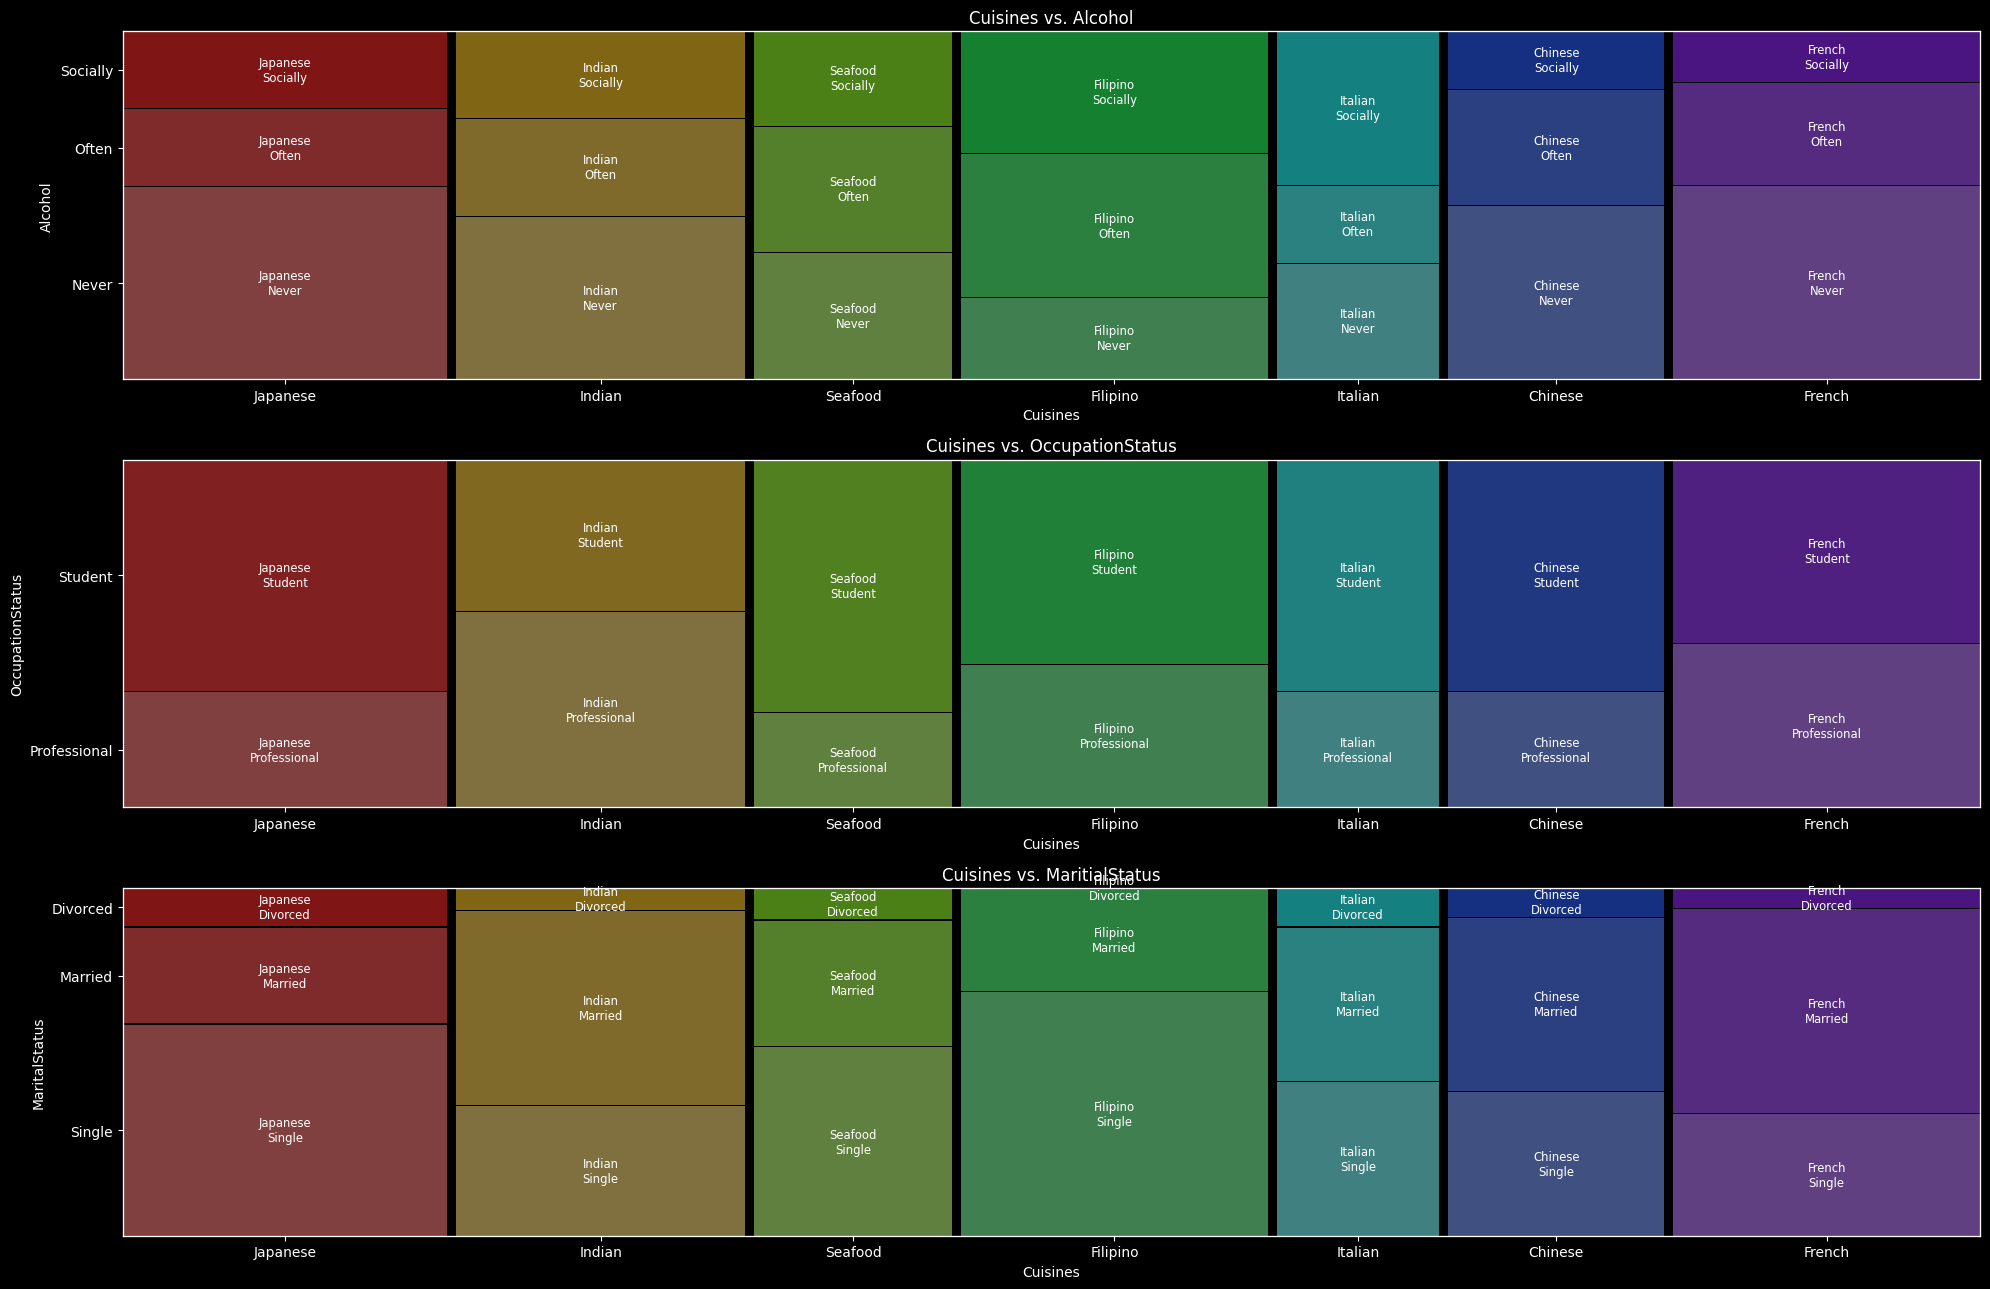

In [233]:
# Let us take a look into the Cuisines and how it is related to Smoker, Alcohol, Occupation Status and Marital Status

fig, axes = plt.subplots(3, 1, figsize=(20, 13))

mosaic(df, ['Cuisines', 'Alcohol'], title='Cuisines vs. Alcohol', ax=axes[0])
axes[0].set_xlabel('Cuisines')
axes[0].set_ylabel('Alcohol')

mosaic(df, ['Cuisines', 'OccupationStatus'], title='Cuisines vs. OccupationStatus', ax=axes[1])
axes[1].set_xlabel('Cuisines')
axes[1].set_ylabel('OccupationStatus')

mosaic(df, ['Cuisines', 'MaritalStatus'], title='Cuisines vs. MaritialStatus', ax=axes[2])
axes[2].set_xlabel('Cuisines')
axes[2].set_ylabel('MaritalStatus')

plt.tight_layout()
plt.show()

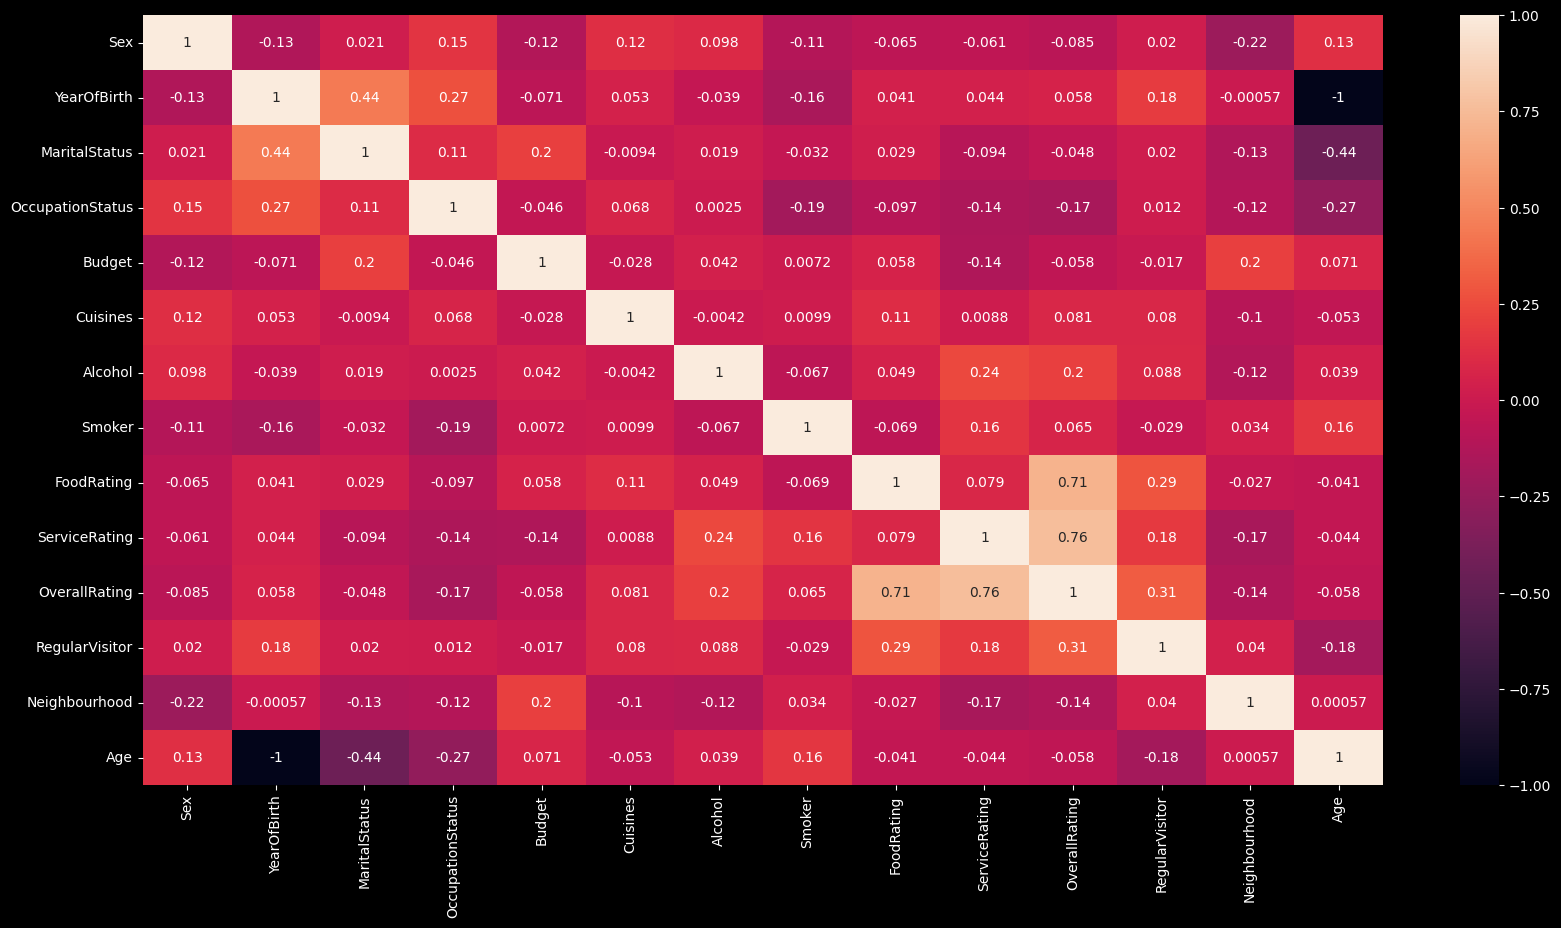

In [235]:
# Let us encode all the categorical values and show a correlation heatmap as a final goodbye visual
le=LabelEncoder()
for col in df.columns[df.dtypes=='object']:
    df[col]=le.fit_transform(df[col])

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
# there are much more analysis and visuals to make, but this is all for this notebook :(
# Kindly Upvote and provide feedback and suggestion to improve this notebook
# Thank You :)